In [9]:
%matplotlib inline

import glob
import os
import random
import json
import pickle
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

from astropy.table import Table
import rubin_sim.maf.db as db
sys.path.append(os.path.abspath(".."))
from local_opsdb_patch import OpsimDatabase #local
from rubin_sim.maf.utils import m52snr
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.plots as plots

import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metric_bundles as metric_bundles
from astropy.cosmology import z_at_value
from rubin_sim.maf.metrics import BaseMetric
from rubin_sim.maf.slicers import UserPointsSlicer
from rubin_sim.maf.metric_bundles import MetricBundle, MetricBundleGroup
from rubin_sim.maf.db import ResultsDb
import rubin_sim.maf.utils as maf_utils
import rubin_sim.maf.metrics as metrics
from rubin_sim.maf.plots import HealpixSkyMap
import rubin_sim.maf.plots as plots

#from rubin_sim.utils import equatorialFromGalactic, hpid2RaDec, _healbin, healbin
from astropy.coordinates import Galactic, ICRS
import astropy.units as u
import healpy as hp

from rubin_sim.phot_utils import DustValues

dust_model = DustValues()
#from rubin_sim.utils import getPackageDir
from importlib import resources

def getPackageDir(pkg_name):
    try:
        return resources.files(pkg_name).parent
    except Exception as e:
        raise RuntimeError(f"Could not find package {pkg_name}: {e}")

In [56]:
import sys
import importlib

# Clear the module from cache
if "local_GRBafterglows_metric" in sys.modules:
    del sys.modules["local_GRBafterglows_metric"]

# Re-import and reload the updated module
import local_GRBafterglows_metric
importlib.reload(local_GRBafterglows_metric)

# Import updated classes and functions from the refactored module
from local_GRBafterglows_metric import (
    GRBAfterglowLC,
    GRBAfterglowDetectMetric,
    generateGRBPopSlicer
)


# Confirm path
print(local_GRBafterglows_metric.__file__)

# Filter utility: select events within t_start and t_end range
def filter_population_by_time(slicer, t_start, t_end):
    peak_times = slicer.slice_points['peak_time']
    mask = (peak_times >= t_start) & (peak_times < t_end)
    ra = slicer.slice_points['ra'][mask]
    dec = slicer.slice_points['dec'][mask]
    print("Filtered Dec sample (rad):", dec[:10])
    new_slicer = metric_bundles.UserPointsSlicer(ra=ra, dec=dec, badval=0)
    new_slicer.slice_points = {k: v[mask] for k, v in slicer.slice_points.items()}
    return new_slicer


/Users/andradenebula/Documents/Research/Transient_Metrics/Multi_Transient_Metrics_Hub/GRBafterglows/local_GRBafterglows_metric.py


## All 10 years

Loaded GRB afterglow templates from GRBAfterglow_templates.pkl
Loaded GRB population from GRBafterglows_fixedpop_detectonly/rd1em06/GRB_population_fixedpop_10yr_rd1em06.pkl

--- Running four_roll_v4.3.1_10yrs ---


/var/folders/tp/cclflcq51yqbq43tdzvfqh_c0000gn/T/ipykernel_39809/80888372.py:52: UserWarning: Warning: converting a masked element to nan.
  n_filters_detected_per_event = np.array([


Out of 41761 simulated GRB events, Rubin detected 11391 under the four_roll_v4.3.1_10yrs cadence.
Of those, each event was observed in an average of 2.6 ± 1.5 filters.


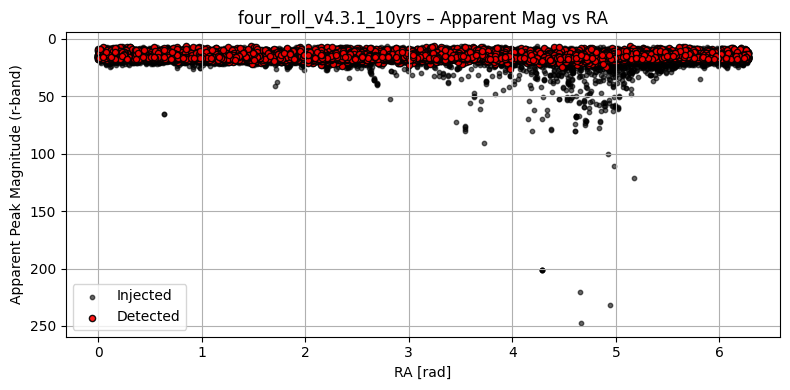

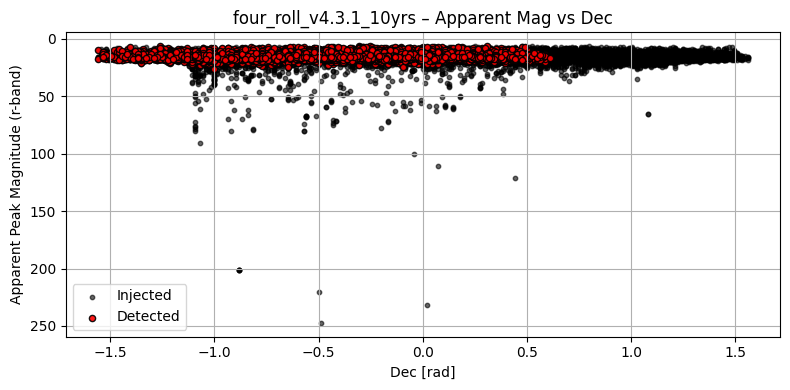

[DEBUG] RA range [rad]: 0.00 – 6.27
[DEBUG] Dec range [rad]: -1.56 – 1.56
[DEBUG] Dec range [deg]: -89.27 – 89.27
[DEBUG] Detected RA, Dec: 348.75, -69.42
[DEBUG] Detected RA, Dec: 298.83, -13.25
[DEBUG] Detected RA, Dec: 14.14, -64.20
[DEBUG] Detected RA, Dec: 111.09, -11.42
[DEBUG] Detected RA, Dec: 11.25, -8.99
[DEBUG] Detected RA, Dec: 253.12, 6.58
[DEBUG] Detected RA, Dec: 258.36, -46.57
[DEBUG] Detected RA, Dec: 186.33, -3.58
[DEBUG] Detected RA, Dec: 321.33, -41.81
[DEBUG] Detected RA, Dec: 355.78, 0.60
[DEBUG] Detected RA, Dec: 63.41, -73.87
[DEBUG] Detected RA, Dec: 118.12, 18.84
[DEBUG] Detected RA, Dec: 93.52, -23.32
[DEBUG] Detected RA, Dec: 45.00, -13.86
[DEBUG] Detected RA, Dec: 326.95, -23.32
[DEBUG] Detected RA, Dec: 96.33, 16.96
[DEBUG] Detected RA, Dec: 170.16, -37.92
[DEBUG] Detected RA, Dec: 125.86, -24.62
[DEBUG] Detected RA, Dec: 353.67, -5.98
[DEBUG] Detected RA, Dec: 208.12, -21.38
[DEBUG] Detected RA, Dec: 353.44, -54.34
[DEBUG] Detected RA, Dec: 285.47, -41.01

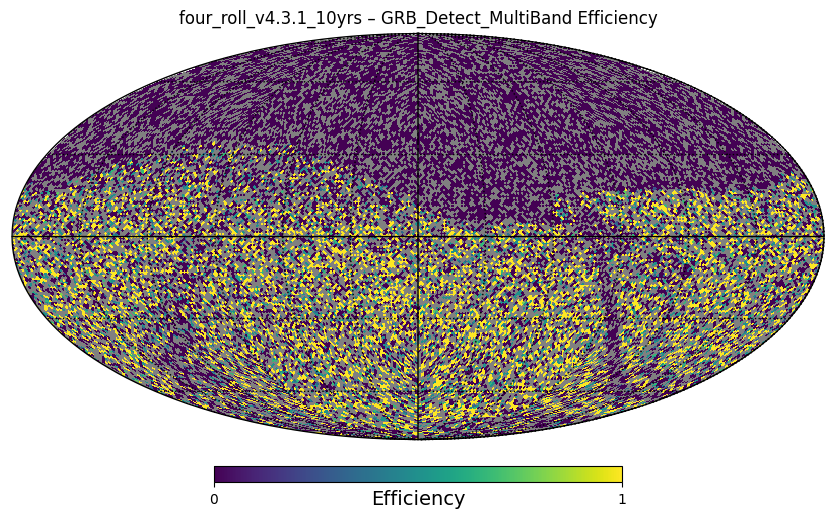


--- Running baseline_v4.3.1_10yrs ---
Out of 41761 simulated GRB events, Rubin detected 11453 under the baseline_v4.3.1_10yrs cadence.
Of those, each event was observed in an average of 2.7 ± 1.5 filters.


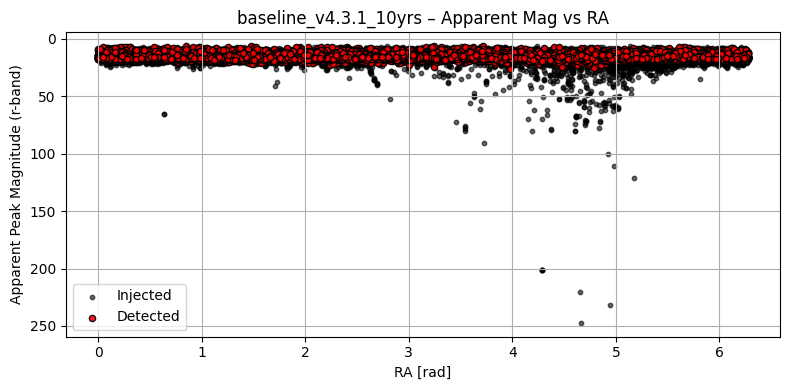

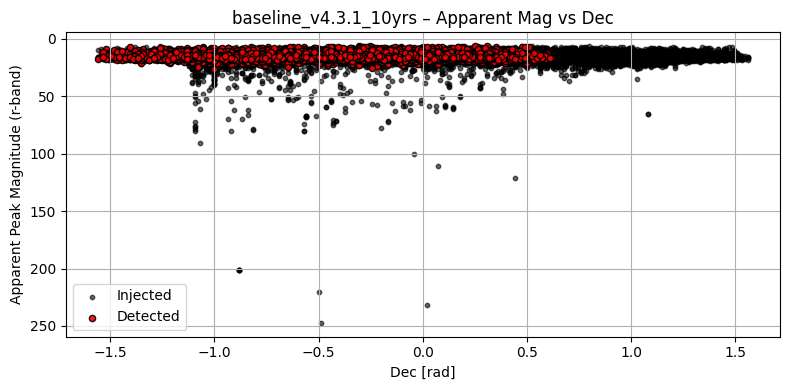

[DEBUG] RA range [rad]: 0.00 – 6.27
[DEBUG] Dec range [rad]: -1.56 – 1.56
[DEBUG] Dec range [deg]: -89.27 – 89.27
[DEBUG] Detected RA, Dec: 111.09, -11.42
[DEBUG] Detected RA, Dec: 333.98, 1.19
[DEBUG] Detected RA, Dec: 269.02, -55.87
[DEBUG] Detected RA, Dec: 33.05, 16.96
[DEBUG] Detected RA, Dec: 12.66, -32.09
[DEBUG] Detected RA, Dec: 196.17, -9.59
[DEBUG] Detected RA, Dec: 53.04, -69.42
[DEBUG] Detected RA, Dec: 313.00, -56.64
[DEBUG] Detected RA, Dec: 265.08, 13.25
[DEBUG] Detected RA, Dec: 204.61, -7.18
[DEBUG] Detected RA, Dec: 276.33, 12.02
[DEBUG] Detected RA, Dec: 165.83, -49.70
[DEBUG] Detected RA, Dec: 170.16, -21.38
[DEBUG] Detected RA, Dec: 110.39, -40.23
[DEBUG] Detected RA, Dec: 292.50, 11.42
[DEBUG] Detected RA, Dec: 117.42, -5.98


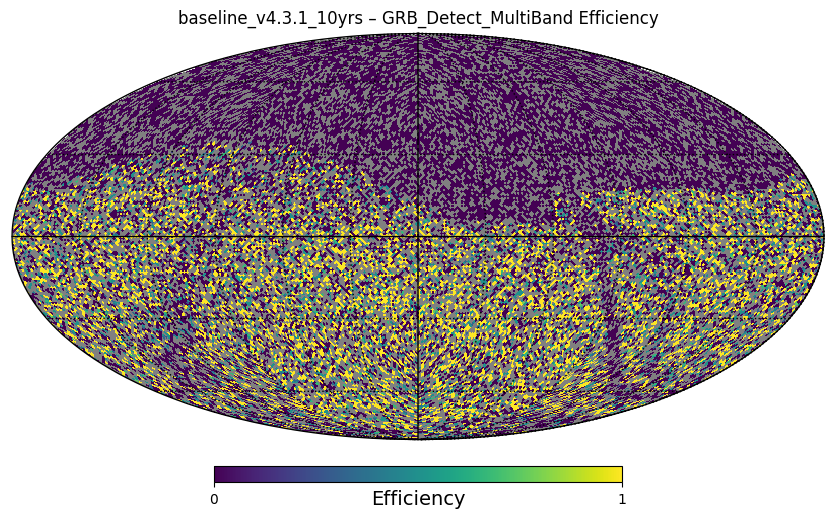

In [62]:
# ---- ALL 10 years Configuration ----
cadences = ['four_roll_v4.3.1_10yrs', 'baseline_v4.3.1_10yrs']
rate_density = 1e-6
rate_str = f"rd{rate_density:.0e}".replace("-", "m")  # Example: 1e-8 to rd1e-8
filters = ['u', 'g', 'r', 'i', 'z', 'y']
grbs_dir = f"GRBafterglows_fixedpop_detectonly/{rate_str}"
grb_templates_file = "GRBAfterglow_templates.pkl"
grb_pop_file = os.path.join(grbs_dir, f"GRB_population_fixedpop_10yr_{rate_str}.pkl")
t_start = 1
t_end = 3652
dmin, dmax = 10, 1000
gal_lat_cut = None
os.makedirs(grbs_dir, exist_ok=True)

# ---- Template Setup ----
if not os.path.exists(grb_templates_file):
    from local_GRBafterglows_metric import generateGRBAfterglowTemplates
    generateGRBAfterglowTemplates(save_to=grb_templates_file)
shared_lc_model = GRBAfterglowLC(load_from=grb_templates_file)

# ---- Population Setup ----
if not os.path.exists(grb_pop_file):
    slicer = generateGRBPopSlicer(
        t_start=t_start, t_end=t_end, seed=42,
        d_min=dmin, d_max=dmax, num_lightcurves=1000,
        gal_lat_cut=gal_lat_cut, rate_density=rate_density,
        save_to=grb_pop_file
    )
else:
    slicer = generateGRBPopSlicer(load_from=grb_pop_file)

n_events = len(slicer.slice_points['distance'])

for cadence in cadences:
    runName = cadence
    db_dir = "/Users/andradenebula/Documents/Research/Transient_Metrics/Multi_Transient_Metrics_Hub"
    db_path = os.path.join(db_dir, f"{cadence}.db")
    opsdb = db_path
    outDir = os.path.join(grbs_dir, f"Metric_temp_{cadence}")
    os.makedirs(outDir, exist_ok=True)
    resultsDb = db.ResultsDb(out_dir=outDir)

    print(f"\n--- Running {cadence} ---")
    per_filter_metrics = OrderedDict()
    for filt in filters:
        detect = GRBAfterglowDetectMetric(metricName=f"GRB_Detect_{filt}", filter_include=[filt], lc_model=shared_lc_model)
        per_filter_metrics[f"GRB_Detect_{filt}"] = metric_bundles.MetricBundle(detect, slicer, '')

    pf_group = metric_bundles.MetricBundleGroup(per_filter_metrics, opsdb, out_dir=outDir, results_db=resultsDb)
    pf_group.run_all()

    n_filters_detected_per_event = np.array([
        sum(per_filter_metrics[f"GRB_Detect_{f}"].metric_values[i] == 1 
            and not per_filter_metrics[f"GRB_Detect_{f}"].metric_values.mask[i]
            for f in filters)
        for i in range(n_events)
    ])
    detected_mask = n_filters_detected_per_event >= 1
    n_detected = np.sum(detected_mask)
    mean_filters = np.mean(n_filters_detected_per_event[detected_mask])
    std_filters = np.std(n_filters_detected_per_event[detected_mask])

    print(f"Out of {n_events} simulated GRB events, Rubin detected {n_detected} under the {cadence} cadence.")
    print(f"Of those, each event was observed in an average of {mean_filters:.1f} ± {std_filters:.1f} filters.")


    # Plot: Apparent magnitude vs RA and Dec for one filter (e.g. 'r')
    filtername = 'r'
    ax1 = DustValues().ax1
    
    ras, decs, peak_mags, detected_flags = [], [], [], []
    
    for i in range(n_events):
        ra = slicer.slice_points['ra'][i]
        dec = slicer.slice_points['dec'][i]  # this is in radians already
        d = slicer.slice_points['distance'][i]
        ebv = slicer.slice_points['ebv'][i]
        file_indx = slicer.slice_points['file_indx'][i]
        
        m_peak = np.min(shared_lc_model.data[file_indx][filtername]['mag'])
        A = ax1[filtername] * ebv
        dm = 5 * np.log10(d * 1e6) - 5
        m_app = m_peak + dm + A
    
        ras.append(ra)
        decs.append(dec)
        peak_mags.append(m_app)
    
        detected = any(
            per_filter_metrics[f"GRB_Detect_{f}"].metric_values[i] == 1
            and not per_filter_metrics[f"GRB_Detect_{f}"].metric_values.mask[i]
            for f in filters
        )
        detected_flags.append(detected)

    # Plot: Apparent magnitude vs RA
    
    plt.figure(figsize=(8, 4))
    plt.scatter(ras, peak_mags, c='black', s=10, label='Injected', alpha=0.6)
    plt.scatter(np.array(ras)[detected_flags], np.array(peak_mags)[detected_flags],
                c='red', s=20, label='Detected', alpha=0.9, edgecolors='black')
    plt.xlabel("RA [rad]")
    plt.ylabel(f"Apparent Peak Magnitude ({filtername}-band)")
    plt.title(f"{cadence} – Apparent Mag vs RA")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot: Apparent magnitude vs Dec
    plt.figure(figsize=(8, 4))
    plt.scatter(decs, peak_mags, c='black', s=10, label='Injected', alpha=0.6)
    plt.scatter(np.array(decs)[detected_flags], np.array(peak_mags)[detected_flags],
                c='red', s=20, label='Detected', alpha=0.9, edgecolors='black')
    plt.xlabel("Dec [rad]")
    plt.ylabel(f"Apparent Peak Magnitude ({filtername}-band)")
    plt.title(f"{cadence} – Apparent Mag vs Dec")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Optional: save summaries or plot
    outfile = os.path.join(grbs_dir, f"local_efficiency_{cadence}_GRBA.csv")
    with open(outfile, "w") as out:
        out.write("sid,n_filters_detected\n")
        for i in range(n_events):
            out.write(f"{i},{n_filters_detected_per_event[i]}\n")

    # Add multi-band metrics
    multi_metrics = [
        GRBAfterglowDetectMetric(metricName="GRB_Detect_MultiBand", lc_model=shared_lc_model),
        #GRBAfterglowCharacterizeMetric(metricName="GRB_Characterize_MultiBand", lc_model=shared_lc_model),
        #GRBAfterglowSpecTriggerableMetric(metricName="GRB_SpecTriggerable_MultiBand", lc_model=shared_lc_model),
        #GRBAfterglowColorEvolveMetric(metricName="GRB_ColorEvolve_MultiBand", lc_model=shared_lc_model),
        #GRBAfterglowHistoricalMatchMetric(metricName="GRB_HistoricalMatch_MultiBand", lc_model=shared_lc_model)
    ]

    for metric in multi_metrics:
        mb_key = f"{runName}_{metric.__class__.__name__}"
        bundle = metric_bundles.MetricBundle(metric, slicer, '', file_root=mb_key, plot_funcs=[], summary_metrics=[])
        bgroup = metric_bundles.MetricBundleGroup({mb_key: bundle}, opsdb, out_dir=outDir, results_db=resultsDb)
        bgroup.run_all()

        # Healpix plotting

        print(f"[DEBUG] RA range [rad]: {ra_rad.min():.2f} – {ra_rad.max():.2f}")
        print(f"[DEBUG] Dec range [rad]: {dec_rad.min():.2f} – {dec_rad.max():.2f}")
        print(f"[DEBUG] Dec range [deg]: {np.degrees(dec_rad).min():.2f} – {np.degrees(dec_rad).max():.2f}")
        
        nside = slicer.nside if hasattr(slicer, 'nside') else 64
        npix = hp.nside2npix(nside)
        injected_map = np.zeros(npix)
        detected_map = np.zeros(npix)

        ra_rad = slicer.slice_points['ra']
        dec_rad = slicer.slice_points['dec']
        theta = 0.5 * np.pi - dec_rad
        phi = ra_rad
        pix_inds = hp.ang2pix(nside, theta, phi)

        for i, pix in enumerate(pix_inds):
            injected_map[pix] += 1
            if bundle.metric_values[i] == 1:
                if np.random.rand() < 0.001:
                    print(f"[DEBUG] Detected RA, Dec: {np.degrees(ra_rad[i]):.2f}, {np.degrees(dec_rad[i]):.2f}")
                detected_map[pix] += 1

        eff_map = np.zeros(npix)
        mask = injected_map > 0
        eff_map[mask] = detected_map[mask] / injected_map[mask]
        eff_map[~mask] = hp.UNSEEN

        hp.mollview(eff_map, title=f"{runName} – {metric.metricName} Efficiency", unit='Efficiency', cmap='viridis')
        hp.graticule()
        plt.show()


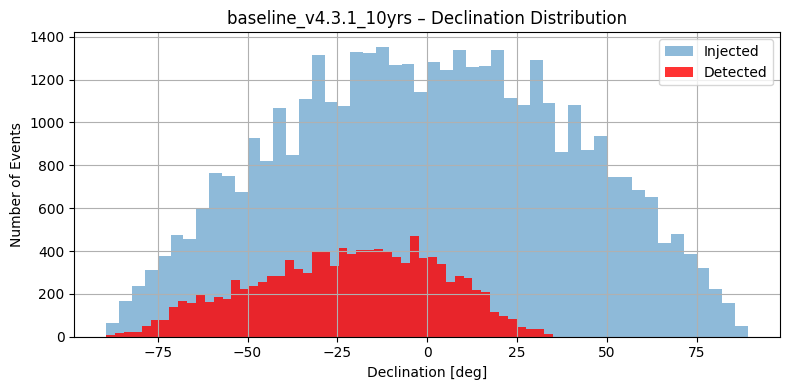

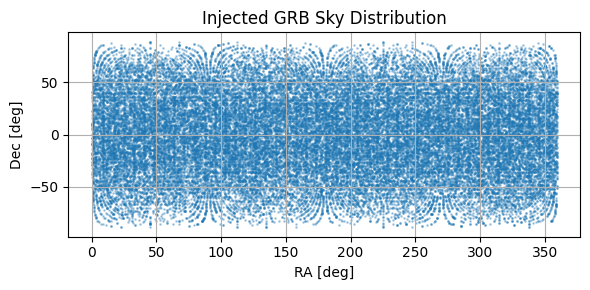

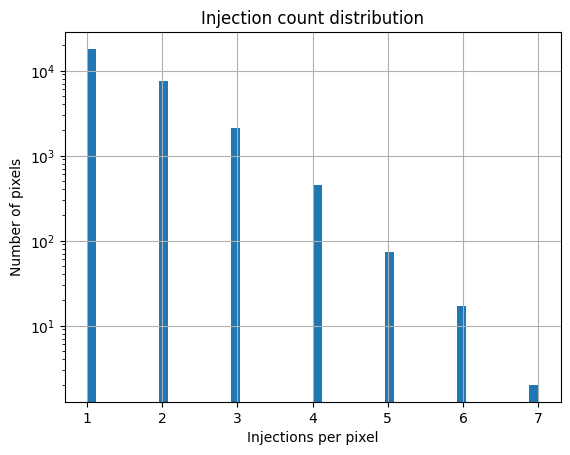

In [66]:
plt.figure(figsize=(8, 4))

plt.hist(np.degrees(slicer.slice_points['dec']), bins=50, alpha=0.5, label='Injected')
plt.hist(np.degrees(np.array(decs)[detected_flags]), bins=50, alpha=0.8, label='Detected', color='red')
plt.xlabel("Declination [deg]")
plt.ylabel("Number of Events")
plt.title(f"{cadence} – Declination Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
plt.scatter(np.degrees(ra_rad), np.degrees(dec_rad), s=1, alpha=0.3)
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.title("Injected GRB Sky Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.hist(injected_map[injected_map > 0], bins=50, log=True)
plt.xlabel("Injections per pixel")
plt.ylabel("Number of pixels")
plt.title("Injection count distribution")
plt.grid(True)
plt.show()



## Per year

Loaded GRB afterglow templates from GRBAfterglow_templates.pkl
Simulated 42077 GRB events using rate_density = 1.0e-06


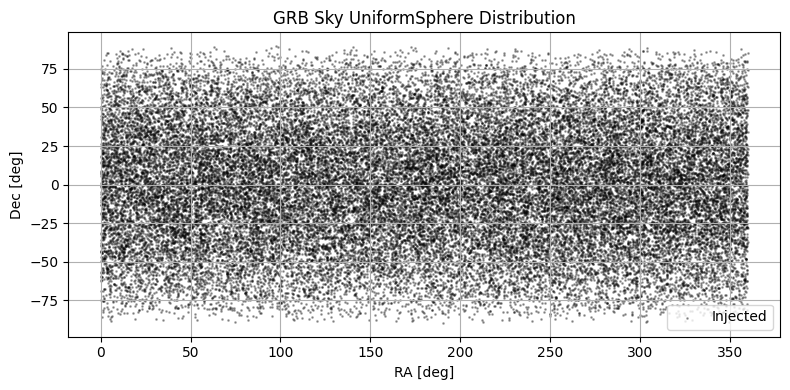

YAY! UNIFORM SPHERE!


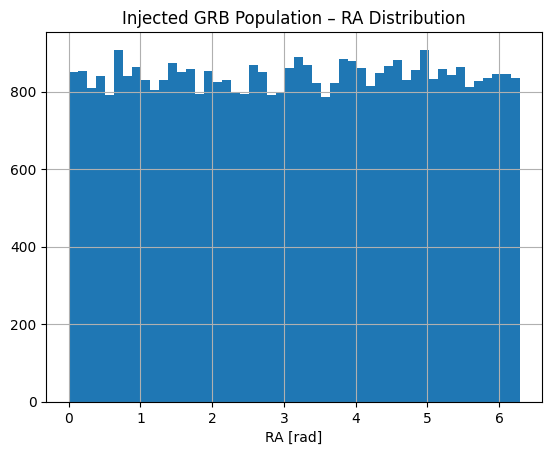

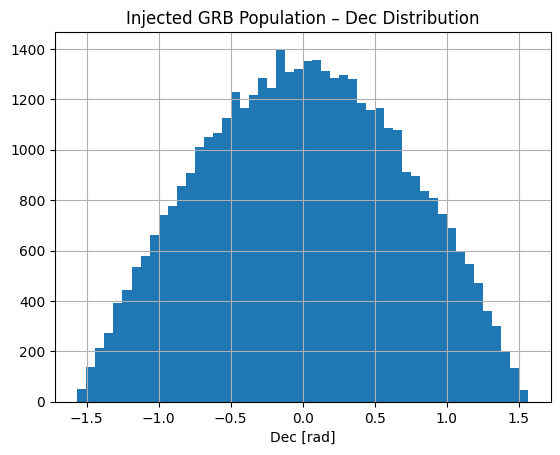

[DEBUG]Print 5 sample before SkyCoord - ra,dec: {'sid': array([    0,     1,     2, ..., 42074, 42075, 42076], shape=(42077,)), 'ra': array([4.86290927, 2.75755456, 5.39472984, ..., 2.95619371, 1.85293725,
       2.18611276], shape=(42077,)), 'dec': array([-0.26283153, -0.50066215,  0.55504676, ..., -0.73230746,
       -1.02463415,  0.63378378], shape=(42077,)), 'gall': array([0.30744593, 4.70113304, 1.27340753, ..., 4.97108474, 4.69698648,
       3.2372127 ], shape=(42077,)), 'galb': array([-0.05502886,  0.43537362, -0.09421314, ...,  0.30694829,
       -0.37147552,  0.57432028], shape=(42077,))}
[DEBUG] coords.dec[:5]: [-15.05913749 -28.68582821  31.80183679  38.58993097   4.53307345] deg
[DEBUG] coords.dec.unit: deg


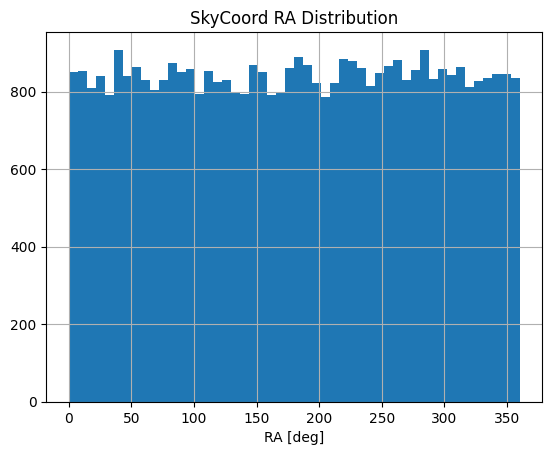

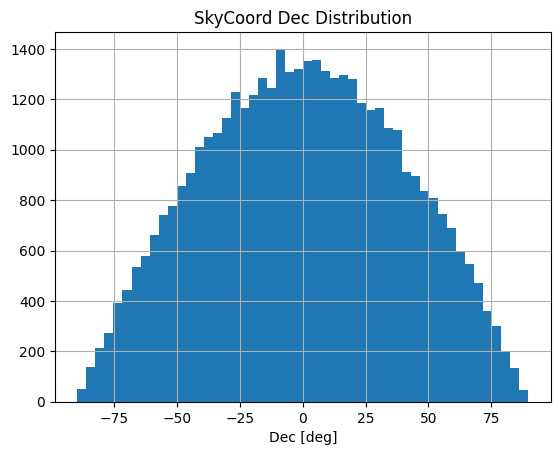

Saved GRB population to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/GRB_population_fixedpop_10yr_rd1em06.pkl
Loaded GRB population from AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/GRB_population_fixedpop_10yr_rd1em06.pkl
Injecting population using rate_density = 1.0e-06

=== Running GRB Detect-only for cadence: four_roll_v4.3.1_10yrs ===

 Year 1: 1-365 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 1: [-53.37790666 -66.17029238 -64.02446736 -57.59451267 -71.85117693
 -80.05212003 -65.49898799 -73.78668129 -57.1970671  -55.4695081 ]
Injected GRBs in year 1: 4136


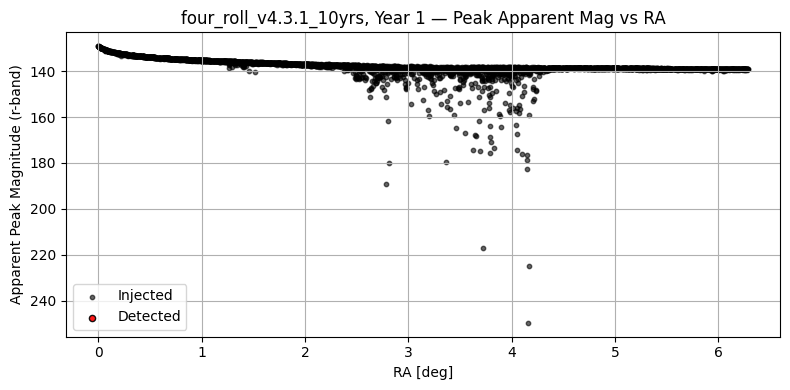

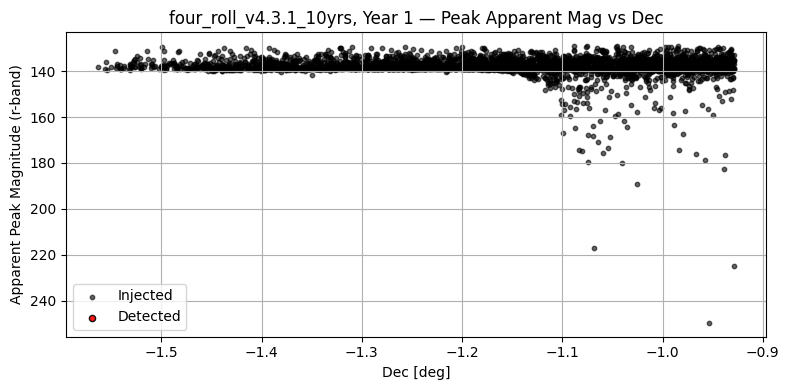


 Out of 4136 simulated GRB events, Rubin detected 0 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 1:
  u-band: 0 detections
  g-band: 0 detections
  r-band: 0 detections
  i-band: 0 detections
  z-band: 0 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.93162022 -1.15488947 -1.11743776 -1.00521388 -1.25403961 -1.39717307
 -1.143173   -1.28782053 -0.99827714 -0.96812555]
Theta range (mollview): 2.4993338895702824 3.1343036580469836
Any bad theta? False
Sample Decs (deg) for plotted map: [-53.37790666 -66.17029238 -64.02446736 -57.59451267 -71.85117693
 -80.05212003 -65.49898799 -73.78668129 -57.1970671  -55.4695081 ]


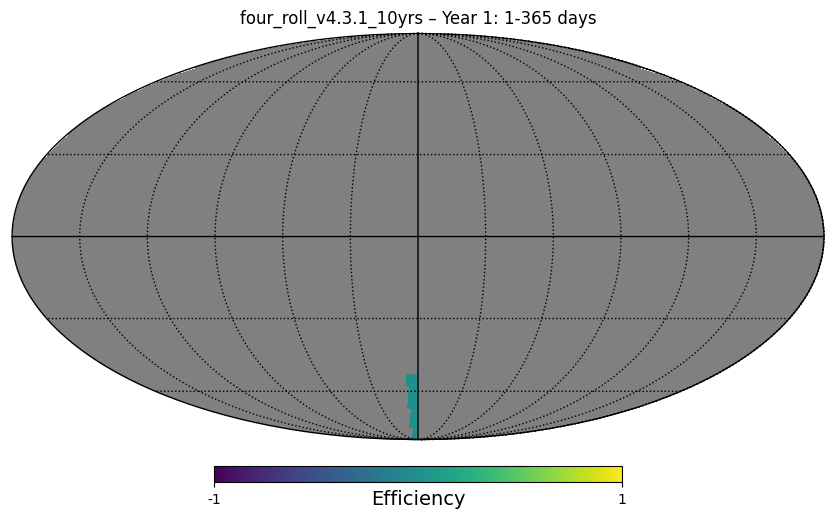

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year1.png

 Year 2: 365-730 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 2: [-46.6103098  -50.10108128 -45.81020838 -44.53934531 -50.8214179
 -43.50433606 -47.91112363 -39.54193598 -42.59000897 -37.9356624 ]
Injected GRBs in year 2: 4158


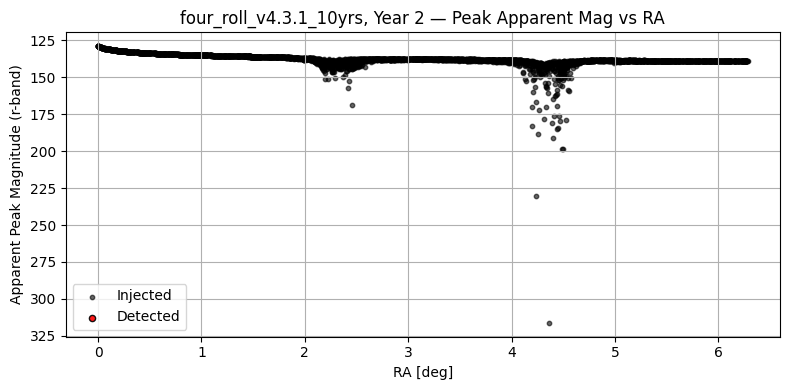

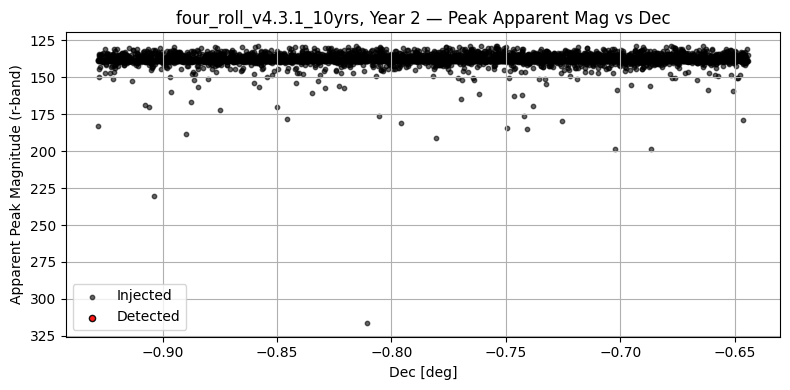


 Out of 4158 simulated GRB events, Rubin detected 0 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 2:
  u-band: 0 detections
  g-band: 0 detections
  r-band: 0 detections
  i-band: 0 detections
  z-band: 0 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.81350337 -0.87442883 -0.79953897 -0.77735822 -0.88700107 -0.7592939
 -0.83620686 -0.69013698 -0.74333588 -0.66210221]
Theta range (mollview): 2.2151239355329246 2.499023104513375
Any bad theta? False
Sample Decs (deg) for plotted map: [-46.6103098  -50.10108128 -45.81020838 -44.53934531 -50.8214179
 -43.50433606 -47.91112363 -39.54193598 -42.59000897 -37.9356624 ]


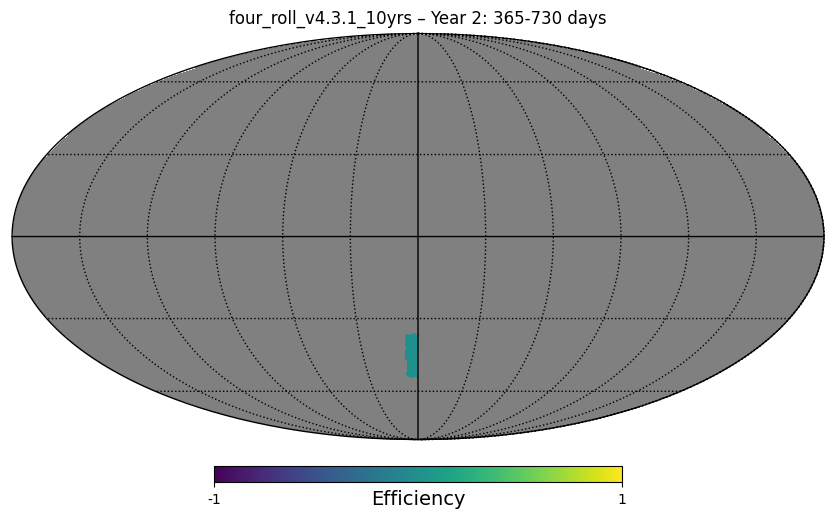

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year2.png

 Year 3: 730-1095 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 3: [-28.68582821 -29.69668077 -26.60744288 -24.94343844 -34.15112041
 -36.7445386  -32.12682087 -28.04835642 -28.54062978 -25.32870596]
Injected GRBs in year 3: 4225


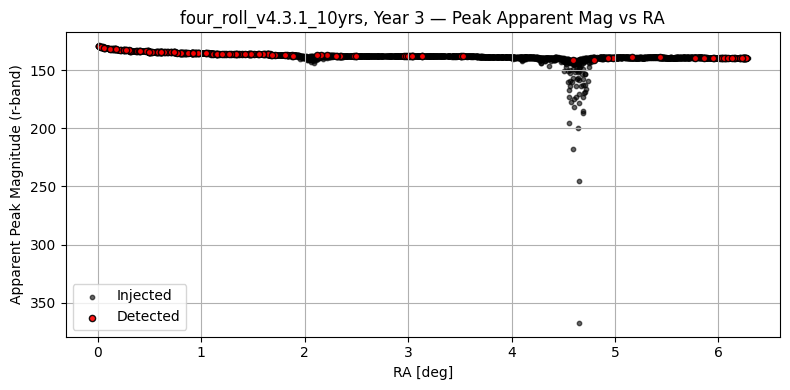

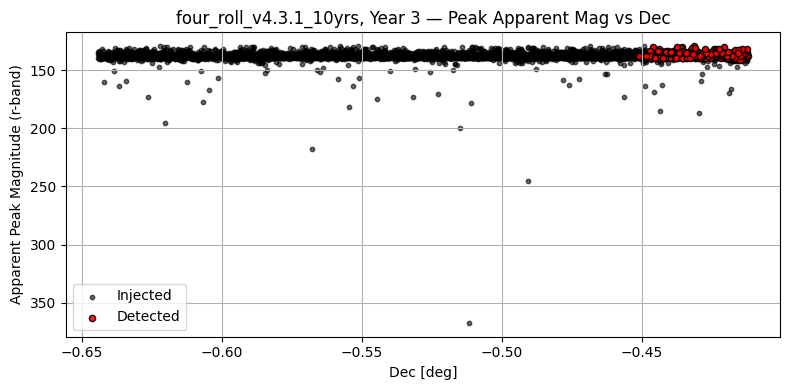


 Out of 4225 simulated GRB events, Rubin detected 189 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.3 ± 1.4 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 3:
  u-band: 78 detections
  g-band: 114 detections
  r-band: 98 detections
  i-band: 45 detections
  z-band: 48 detections
  y-band: 48 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.50066215 -0.51830486 -0.46438748 -0.43534513 -0.59604949 -0.64131318
 -0.5607188  -0.48953617 -0.49812796 -0.44206931]
Theta range (mollview): 1.983119363016083 2.215001968097945
Any bad theta? False
Sample Decs (deg) for plotted map: [-28.68582821 -29.69668077 -26.60744288 -24.94343844 -34.15112041
 -36.7445386  -32.12682087 -28.04835642 -28.54062978 -25.32870596]


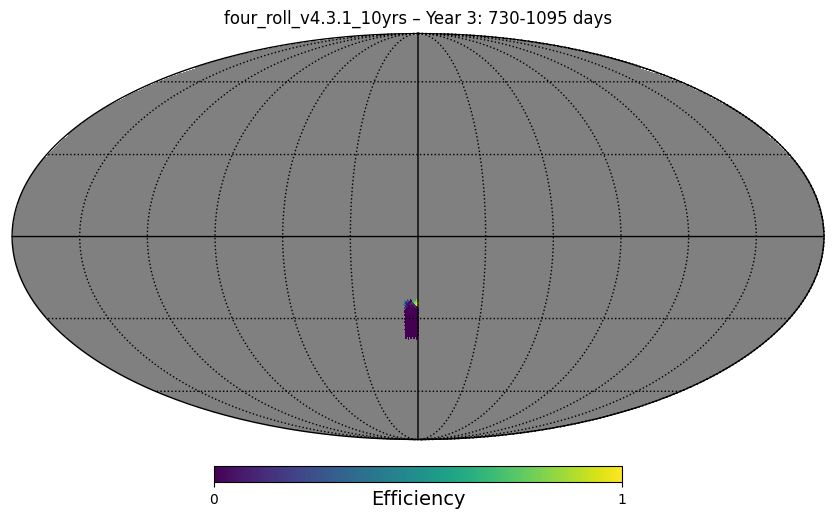

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year3.png

 Year 4: 1095-1460 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 4: [-15.05913749 -16.67675545 -12.34401598 -13.57180785 -21.14233036
 -14.07995125 -13.95547144 -15.20696949 -17.59152084 -14.19601198]
Injected GRBs in year 4: 4130


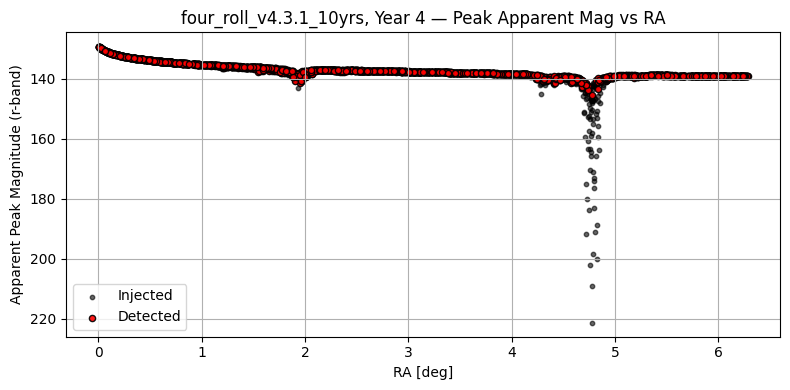

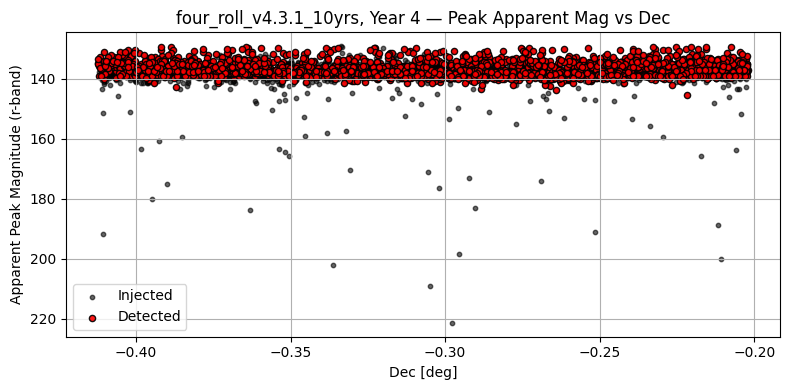


 Out of 4130 simulated GRB events, Rubin detected 2671 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.7 ± 1.4 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 4:
  u-band: 574 detections
  g-band: 813 detections
  r-band: 1545 detections
  i-band: 1452 detections
  z-band: 1444 detections
  y-band: 1293 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.26283153 -0.29106429 -0.21544372 -0.23687273 -0.36900328 -0.24574151
 -0.24356893 -0.26541169 -0.30702996 -0.24776715]
Theta range (mollview): 1.772951282466711 1.9830346782634376
Any bad theta? False
Sample Decs (deg) for plotted map: [-15.05913749 -16.67675545 -12.34401598 -13.57180785 -21.14233036
 -14.07995125 -13.95547144 -15.20696949 -17.59152084 -14.19601198]


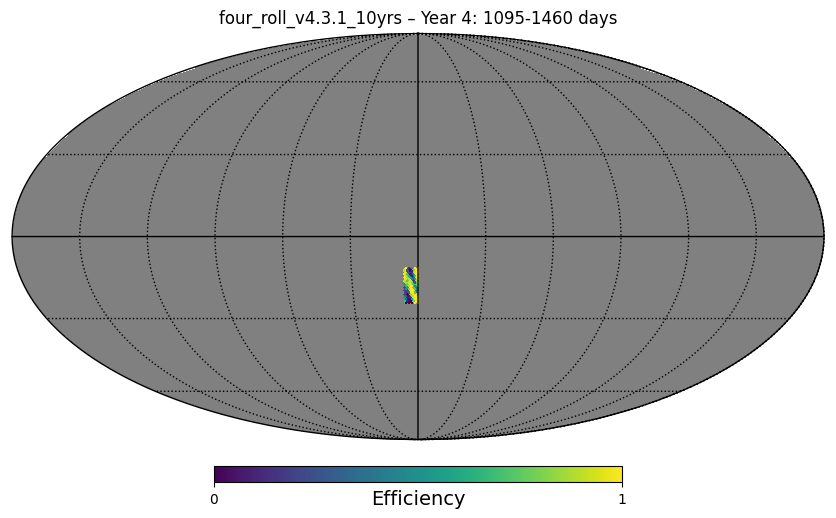

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year4.png

 Year 5: 1460-1825 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 5: [-11.21305943  -9.93454452 -10.64255129  -3.33219075  -9.79102498
  -9.95537314  -2.24124939  -3.99342116  -5.95799845  -6.56029724]
Injected GRBs in year 5: 4295


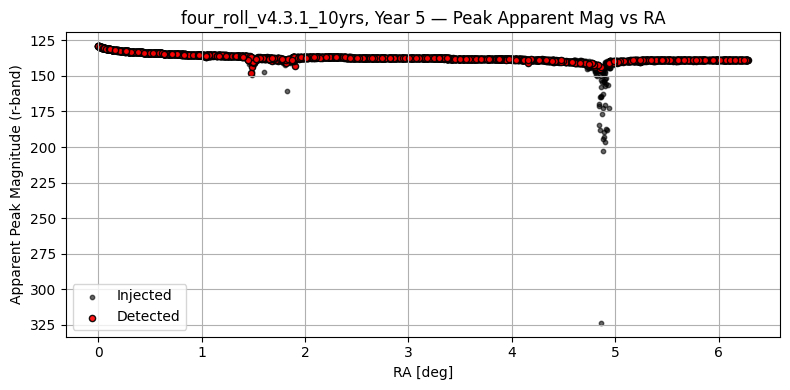

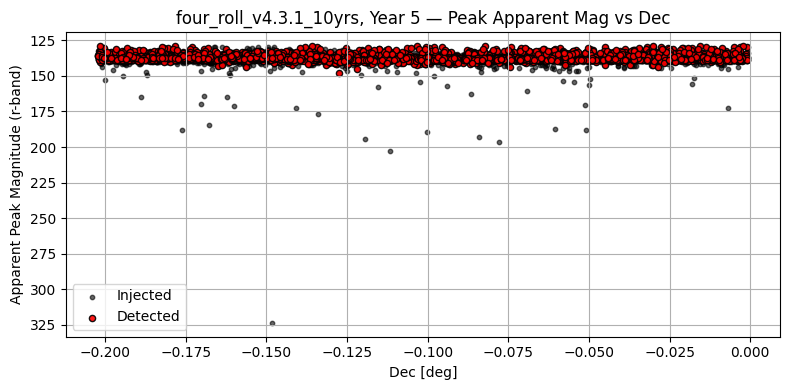


 Out of 4295 simulated GRB events, Rubin detected 2730 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.6 ± 1.4 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 5:
  u-band: 407 detections
  g-band: 911 detections
  r-band: 1744 detections
  i-band: 1544 detections
  z-band: 1416 detections
  y-band: 1128 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.19570481 -0.17339051 -0.18574756 -0.0581577  -0.17088562 -0.17375404
 -0.03911718 -0.06969835 -0.10398669 -0.11449879]
Theta range (mollview): 1.571621201400821 1.7729350845151028
Any bad theta? False
Sample Decs (deg) for plotted map: [-11.21305943  -9.93454452 -10.64255129  -3.33219075  -9.79102498
  -9.95537314  -2.24124939  -3.99342116  -5.95799845  -6.56029724]


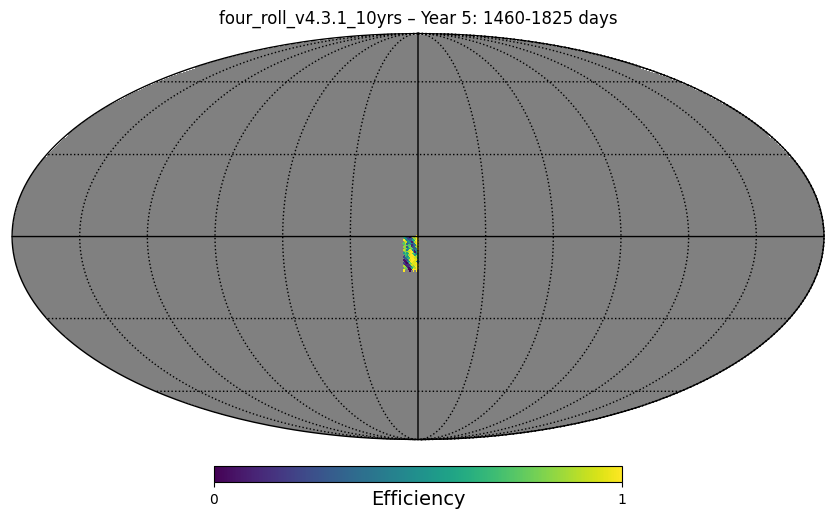

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year5.png

 Year 6: 1825-2190 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 6: [ 4.53307345  0.75589852 11.03964394  3.65362216  0.754393    1.4996857
  9.55222755  1.76978805  5.43926623 11.46239329]
Injected GRBs in year 6: 4302


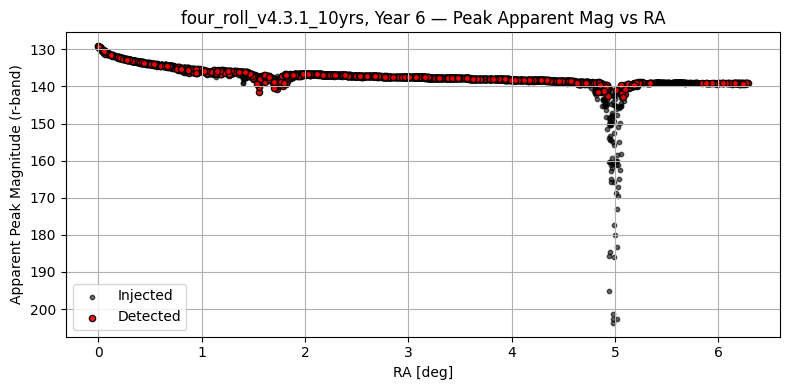

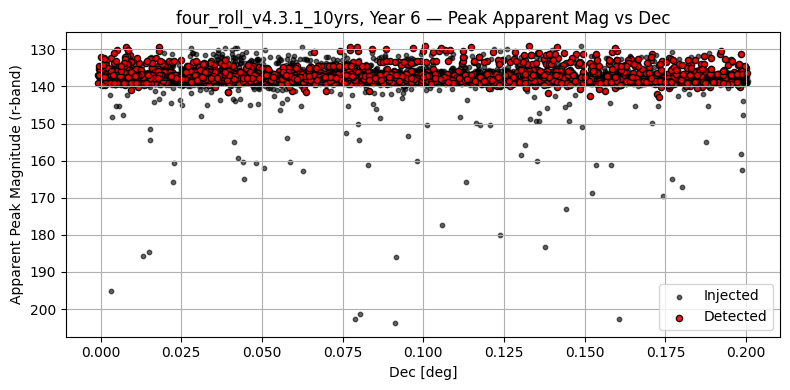


 Out of 4302 simulated GRB events, Rubin detected 1867 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.4 ± 1.4 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 6:
  u-band: 280 detections
  g-band: 659 detections
  r-band: 1039 detections
  i-band: 996 detections
  z-band: 855 detections
  y-band: 594 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.07911706 0.01319292 0.19267813 0.06376774 0.01316664 0.02617445
 0.16671782 0.03088863 0.0949331  0.2000565 ]
Theta range (mollview): 1.3703747062788287 1.5715017138148422
Any bad theta? False
Sample Decs (deg) for plotted map: [ 4.53307345  0.75589852 11.03964394  3.65362216  0.754393    1.4996857
  9.55222755  1.76978805  5.43926623 11.46239329]


/var/folders/tp/cclflcq51yqbq43tdzvfqh_c0000gn/T/ipykernel_19277/3997790206.py:141: UserWarning: Warning: converting a masked element to nan.
  n_filters_detected_per_event = np.array([


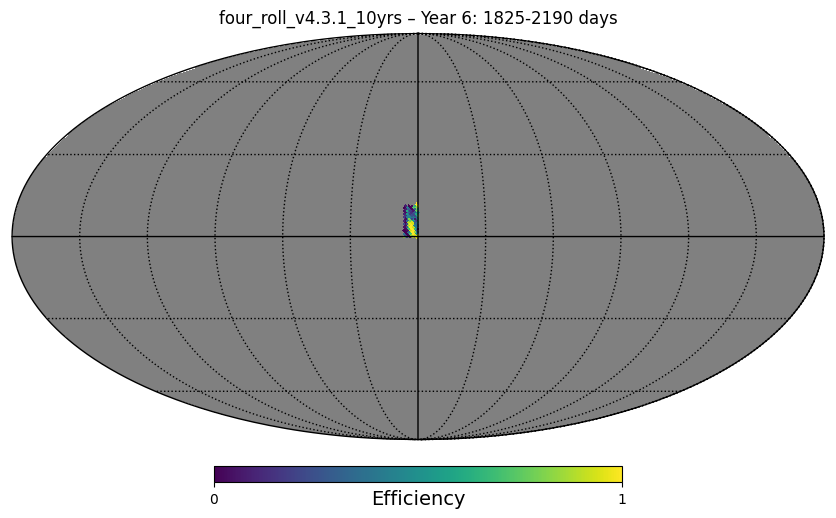

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year6.png

 Year 7: 2190-2555 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 7: [13.99439032 16.37544051 15.46439569 11.64941139 17.50274452 12.36305299
 12.12652341 17.55551982 13.01374317 13.57741139]
Injected GRBs in year 7: 4253


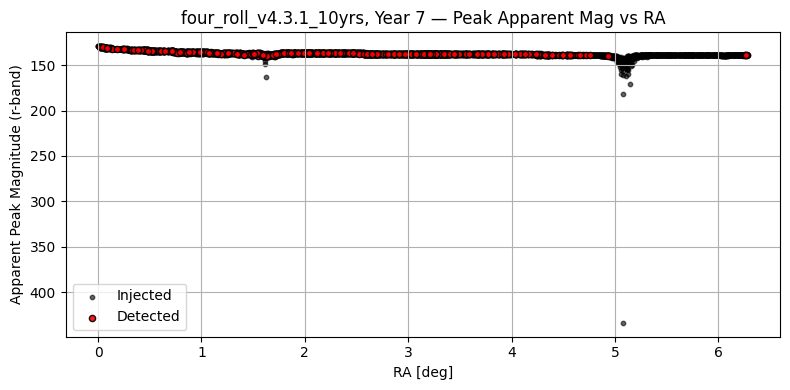

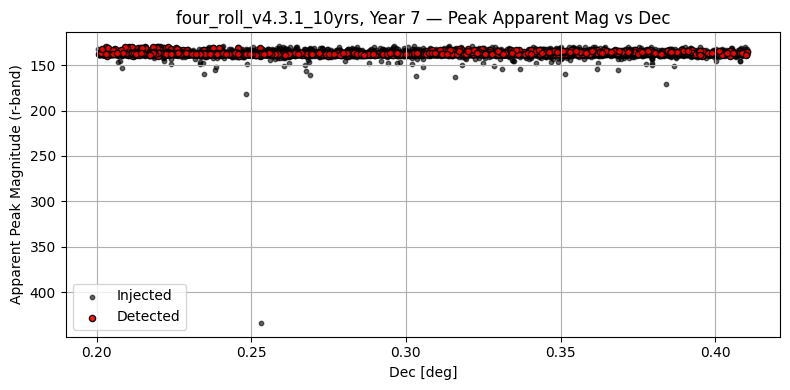


 Out of 4253 simulated GRB events, Rubin detected 1193 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.5 ± 1.4 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 7:
  u-band: 244 detections
  g-band: 487 detections
  r-band: 730 detections
  i-band: 656 detections
  z-band: 532 detections
  y-band: 306 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.24424819 0.28580535 0.26990462 0.20332058 0.30548052 0.21577598
 0.21164776 0.30640162 0.22713267 0.23697053]
Theta range (mollview): 1.1603578335954934 1.3703079795042095
Any bad theta? False
Sample Decs (deg) for plotted map: [13.99439032 16.37544051 15.46439569 11.64941139 17.50274452 12.36305299
 12.12652341 17.55551982 13.01374317 13.57741139]


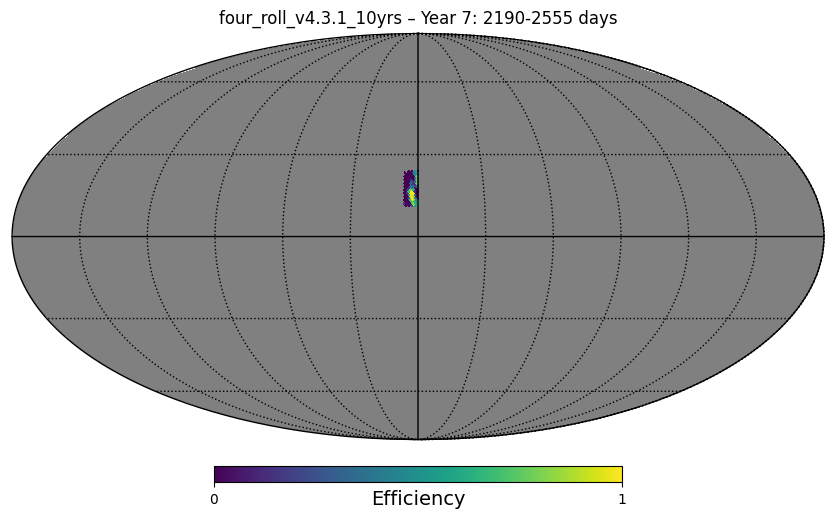

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year7.png

 Year 8: 2555-2920 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 8: [31.80183679 30.69608554 28.88722467 31.64210206 31.25160268 30.90053689
 28.6442136  25.29177802 33.3363358  24.78072025]
Injected GRBs in year 8: 4224


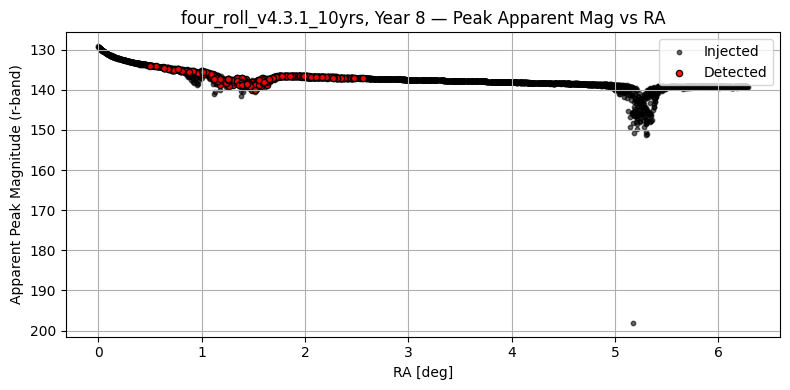

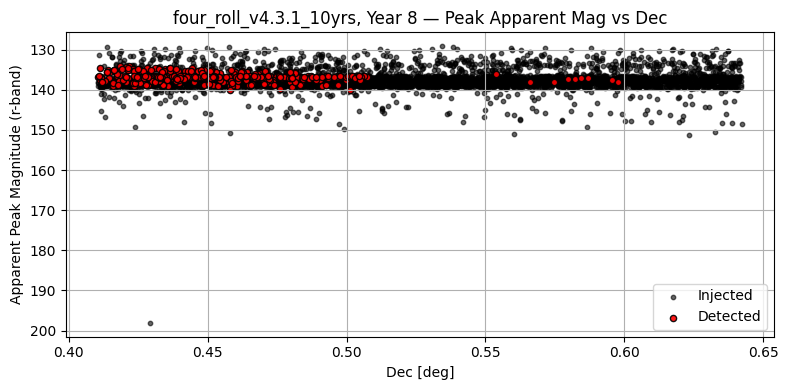


 Out of 4224 simulated GRB events, Rubin detected 384 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.0 ± 0.9 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 8:
  u-band: 0 detections
  g-band: 187 detections
  r-band: 228 detections
  i-band: 184 detections
  z-band: 167 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.55504676 0.53574776 0.50417718 0.55225886 0.54544336 0.53931611
 0.49993584 0.4414248  0.58182882 0.43250516]
Theta range (mollview): 0.9286274954285934 1.1602744793541657
Any bad theta? False
Sample Decs (deg) for plotted map: [31.80183679 30.69608554 28.88722467 31.64210206 31.25160268 30.90053689
 28.6442136  25.29177802 33.3363358  24.78072025]


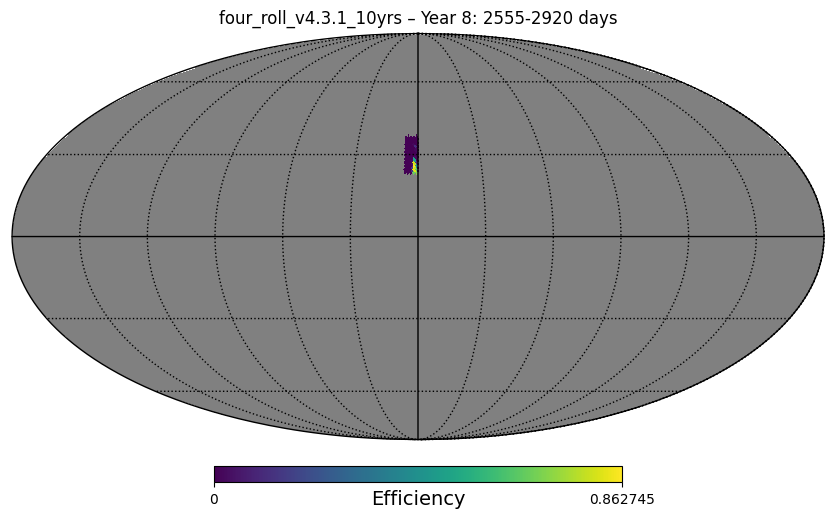

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year8.png

 Year 9: 2920-3285 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 9: [38.58993097 52.99727413 41.06077807 43.05238346 37.15280671 40.120617
 40.21551492 38.2117069  42.7276624  52.43704224]
Injected GRBs in year 9: 4081


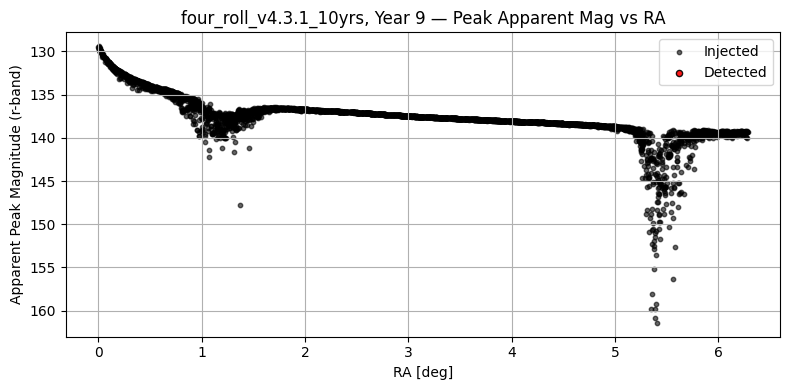

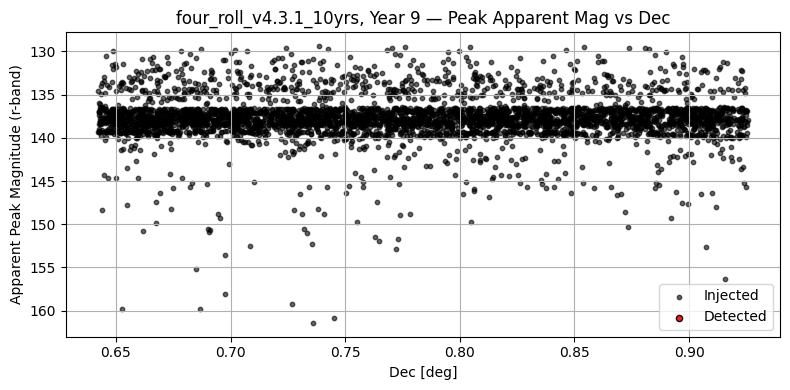


 Out of 4081 simulated GRB events, Rubin detected 0 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 9:
  u-band: -- detections
  g-band: -- detections
  r-band: -- detections
  i-band: -- detections
  z-band: -- detections
  y-band: -- detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.67352135 0.92497693 0.71664577 0.75140584 0.6484388  0.70023686
 0.70189315 0.6669201  0.74573839 0.91519904]
Theta range (mollview): 0.6452830037033669 0.928513033747547
Any bad theta? False
Sample Decs (deg) for plotted map: [38.58993097 52.99727413 41.06077807 43.05238346 37.15280671 40.120617
 40.21551492 38.2117069  42.7276624  52.43704224]


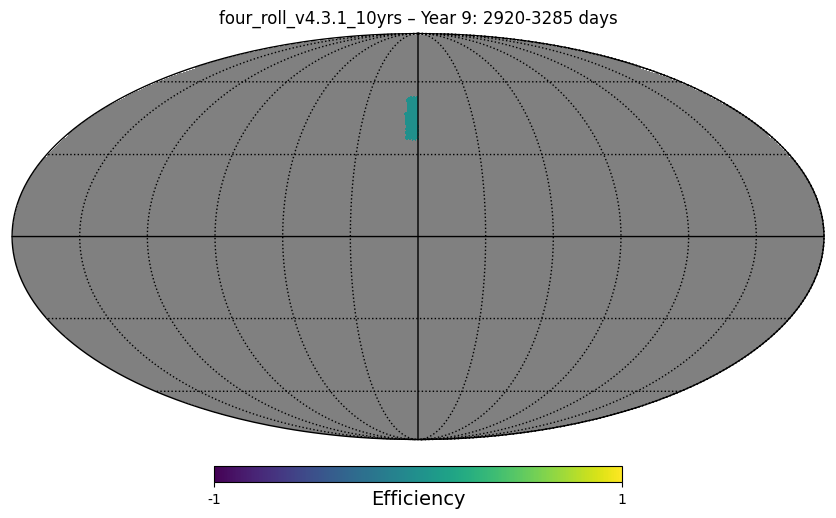

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year9.png

 Year 10: 3285-3652 days
Sample Decs for four_roll_v4.3.1_10yrs, Year 10: [75.93167801 66.93446505 75.93882509 58.27830616 53.9095152  68.33901361
 57.1083013  58.5791667  53.2676252  53.64560514]
Injected GRBs in year 10: 4273


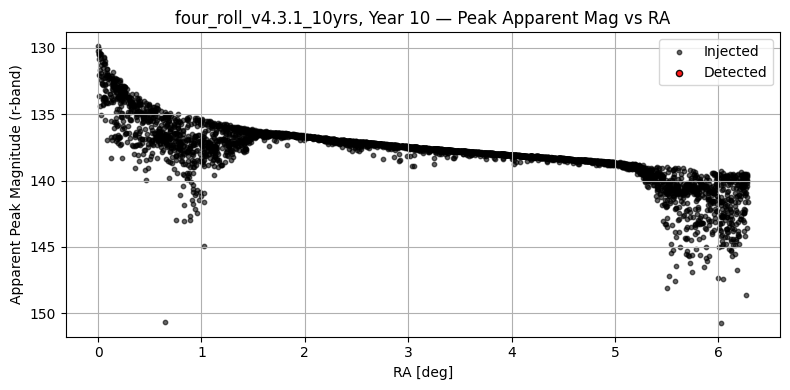

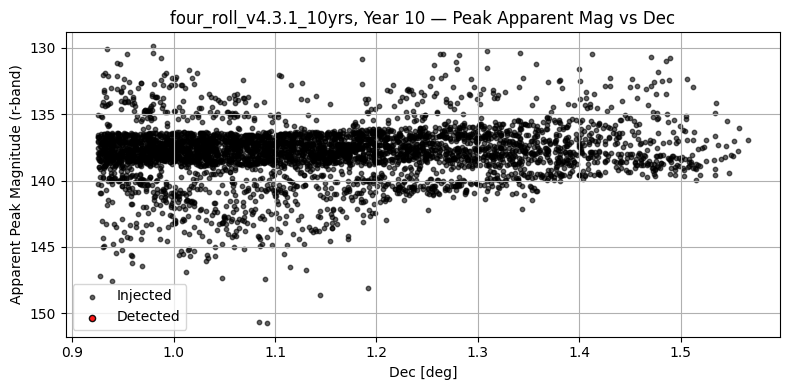


 Out of 4273 simulated GRB events, Rubin detected 0 under the four_roll_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for four_roll_v4.3.1_10yrs, Year 10:
  u-band: -- detections
  g-band: -- detections
  r-band: -- detections
  i-band: -- detections
  z-band: -- detections
  y-band: -- detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [1.32525779 1.1682268  1.32538253 1.01714832 0.94089854 1.1927408
 0.99672789 1.02239933 0.92969544 0.93629244]
Theta range (mollview): 0.005006683166878023 0.6452042010210839
Any bad theta? False
Sample Decs (deg) for plotted map: [75.93167801 66.93446505 75.93882509 58.27830616 53.9095152  68.33901361
 57.1083013  58.5791667  53.2676252  53.64560514]


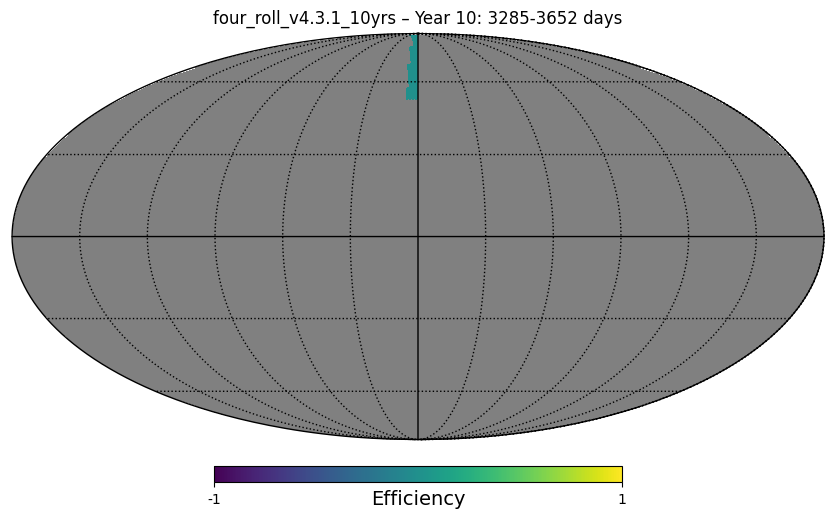

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/four_roll_v4.3.1_10yrs_rd1em06_mollview_year10.png

=== Running GRB Detect-only for cadence: baseline_v4.3.1_10yrs ===

 Year 1: 1-365 days
Sample Decs for baseline_v4.3.1_10yrs, Year 1: [-53.37790666 -66.17029238 -64.02446736 -57.59451267 -71.85117693
 -80.05212003 -65.49898799 -73.78668129 -57.1970671  -55.4695081 ]
Injected GRBs in year 1: 4136


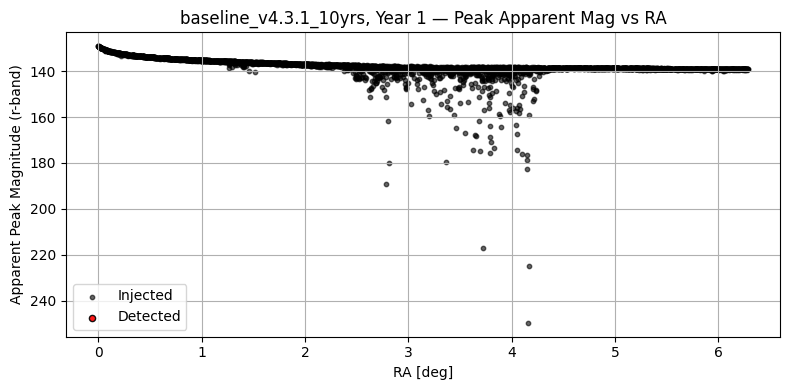

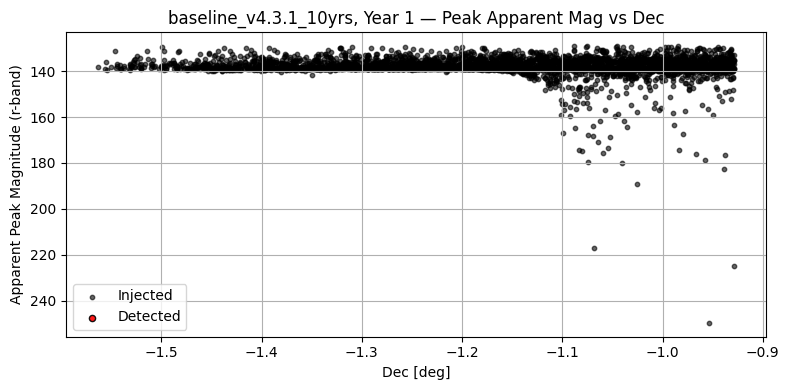


 Out of 4136 simulated GRB events, Rubin detected 0 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 1:
  u-band: 0 detections
  g-band: 0 detections
  r-band: 0 detections
  i-band: 0 detections
  z-band: 0 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.93162022 -1.15488947 -1.11743776 -1.00521388 -1.25403961 -1.39717307
 -1.143173   -1.28782053 -0.99827714 -0.96812555]
Theta range (mollview): 2.4993338895702824 3.1343036580469836
Any bad theta? False
Sample Decs (deg) for plotted map: [-53.37790666 -66.17029238 -64.02446736 -57.59451267 -71.85117693
 -80.05212003 -65.49898799 -73.78668129 -57.1970671  -55.4695081 ]


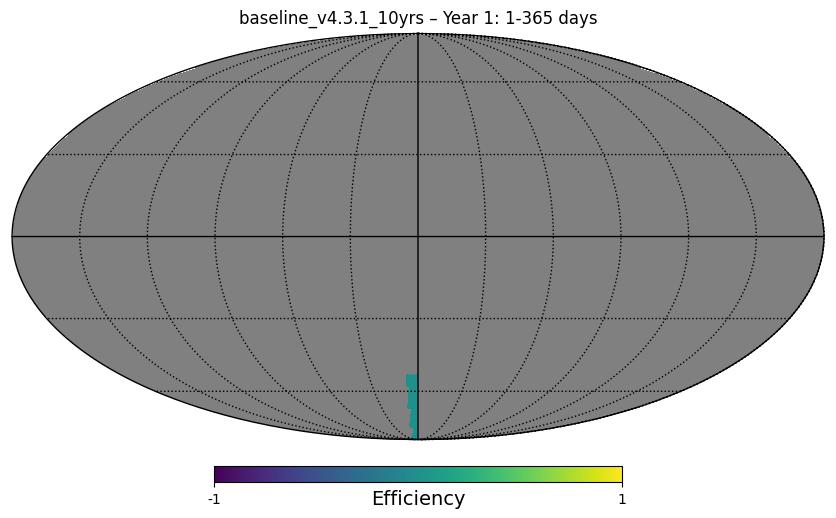

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year1.png

 Year 2: 365-730 days
Sample Decs for baseline_v4.3.1_10yrs, Year 2: [-46.6103098  -50.10108128 -45.81020838 -44.53934531 -50.8214179
 -43.50433606 -47.91112363 -39.54193598 -42.59000897 -37.9356624 ]
Injected GRBs in year 2: 4158


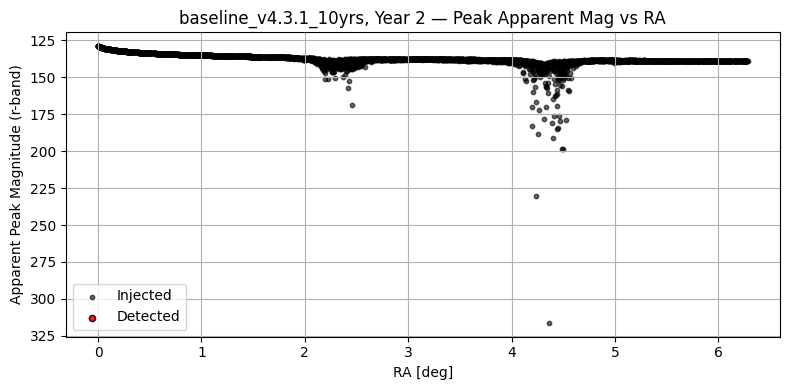

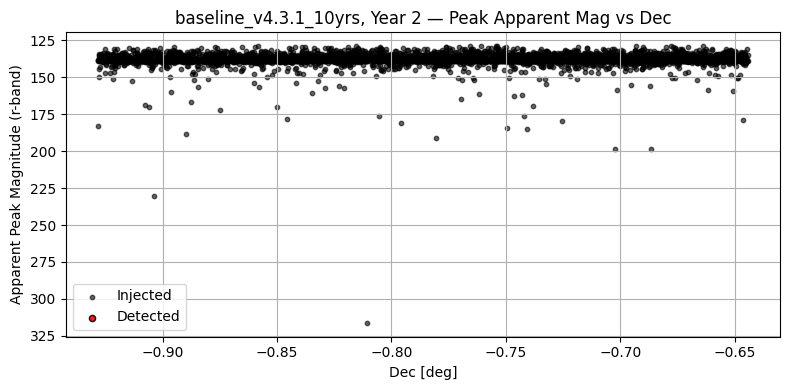


 Out of 4158 simulated GRB events, Rubin detected 0 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 2:
  u-band: 0 detections
  g-band: 0 detections
  r-band: 0 detections
  i-band: 0 detections
  z-band: 0 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.81350337 -0.87442883 -0.79953897 -0.77735822 -0.88700107 -0.7592939
 -0.83620686 -0.69013698 -0.74333588 -0.66210221]
Theta range (mollview): 2.2151239355329246 2.499023104513375
Any bad theta? False
Sample Decs (deg) for plotted map: [-46.6103098  -50.10108128 -45.81020838 -44.53934531 -50.8214179
 -43.50433606 -47.91112363 -39.54193598 -42.59000897 -37.9356624 ]


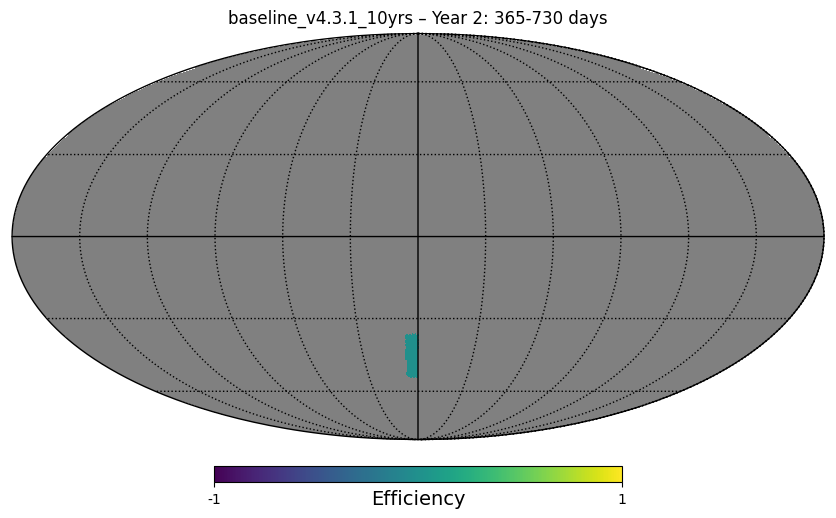

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year2.png

 Year 3: 730-1095 days
Sample Decs for baseline_v4.3.1_10yrs, Year 3: [-28.68582821 -29.69668077 -26.60744288 -24.94343844 -34.15112041
 -36.7445386  -32.12682087 -28.04835642 -28.54062978 -25.32870596]
Injected GRBs in year 3: 4225


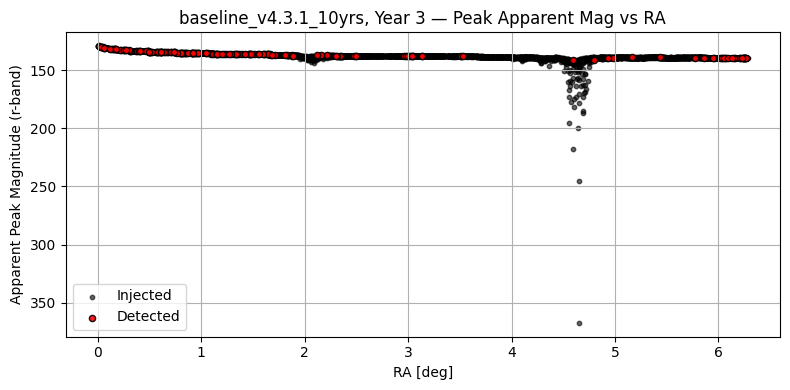

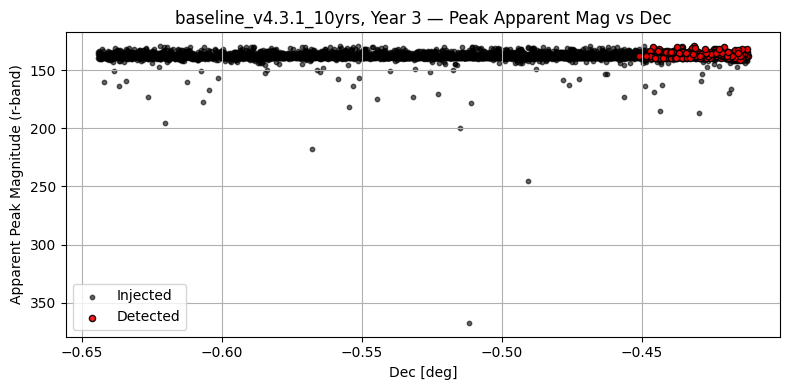


 Out of 4225 simulated GRB events, Rubin detected 189 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.3 ± 1.4 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 3:
  u-band: 78 detections
  g-band: 114 detections
  r-band: 98 detections
  i-band: 45 detections
  z-band: 48 detections
  y-band: 48 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.50066215 -0.51830486 -0.46438748 -0.43534513 -0.59604949 -0.64131318
 -0.5607188  -0.48953617 -0.49812796 -0.44206931]
Theta range (mollview): 1.983119363016083 2.215001968097945
Any bad theta? False
Sample Decs (deg) for plotted map: [-28.68582821 -29.69668077 -26.60744288 -24.94343844 -34.15112041
 -36.7445386  -32.12682087 -28.04835642 -28.54062978 -25.32870596]


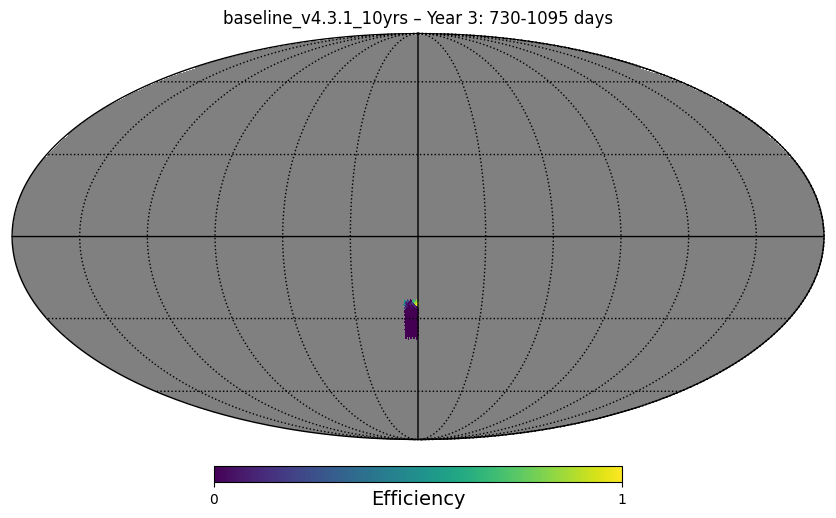

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year3.png

 Year 4: 1095-1460 days
Sample Decs for baseline_v4.3.1_10yrs, Year 4: [-15.05913749 -16.67675545 -12.34401598 -13.57180785 -21.14233036
 -14.07995125 -13.95547144 -15.20696949 -17.59152084 -14.19601198]
Injected GRBs in year 4: 4130


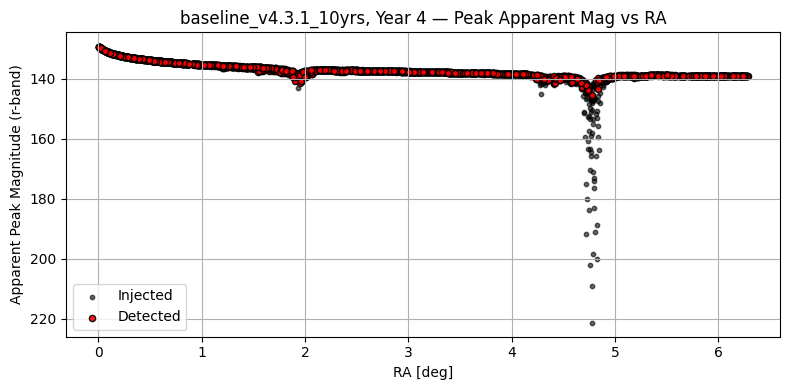

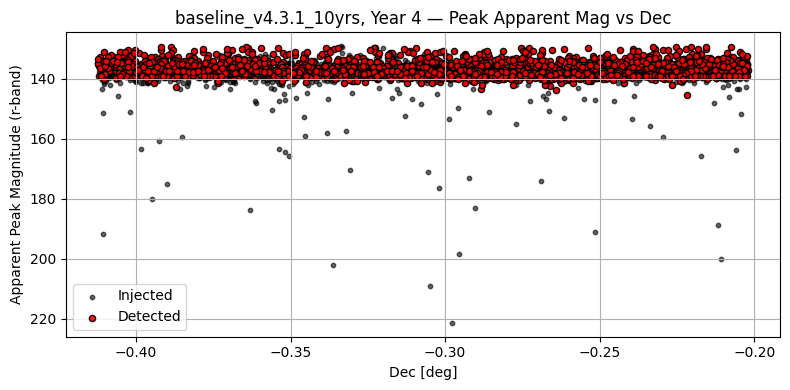


 Out of 4130 simulated GRB events, Rubin detected 2653 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.7 ± 1.4 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 4:
  u-band: 575 detections
  g-band: 825 detections
  r-band: 1534 detections
  i-band: 1441 detections
  z-band: 1434 detections
  y-band: 1288 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.26283153 -0.29106429 -0.21544372 -0.23687273 -0.36900328 -0.24574151
 -0.24356893 -0.26541169 -0.30702996 -0.24776715]
Theta range (mollview): 1.772951282466711 1.9830346782634376
Any bad theta? False
Sample Decs (deg) for plotted map: [-15.05913749 -16.67675545 -12.34401598 -13.57180785 -21.14233036
 -14.07995125 -13.95547144 -15.20696949 -17.59152084 -14.19601198]


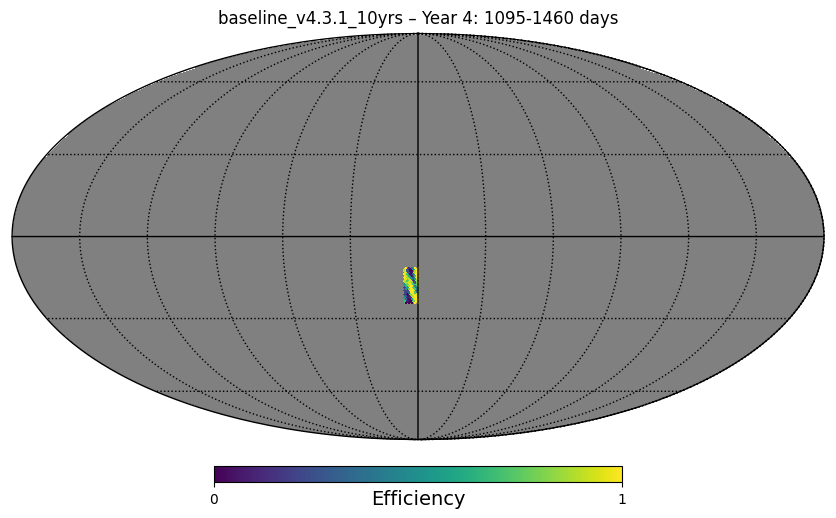

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year4.png

 Year 5: 1460-1825 days
Sample Decs for baseline_v4.3.1_10yrs, Year 5: [-11.21305943  -9.93454452 -10.64255129  -3.33219075  -9.79102498
  -9.95537314  -2.24124939  -3.99342116  -5.95799845  -6.56029724]
Injected GRBs in year 5: 4295


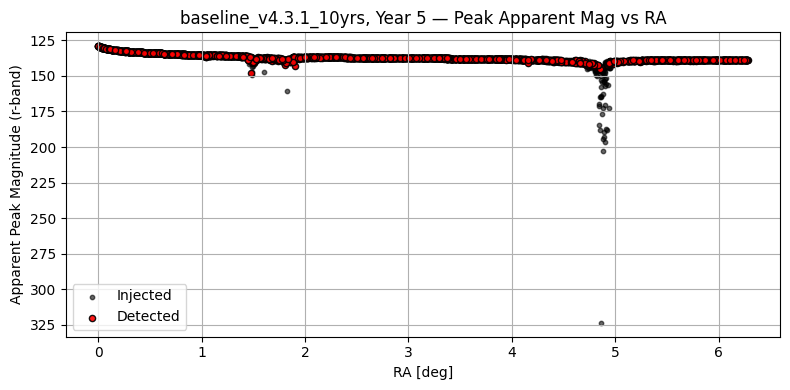

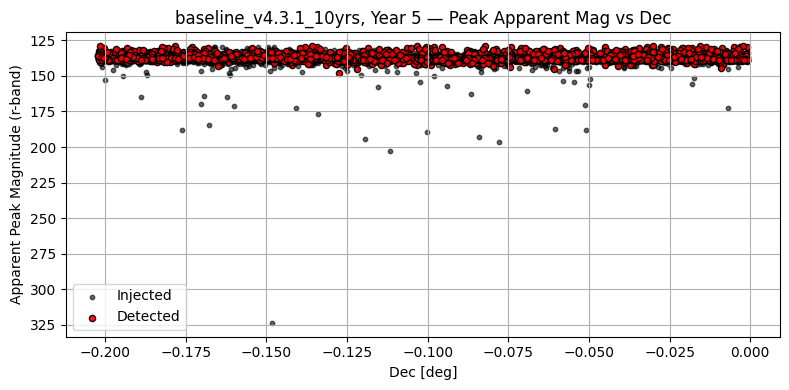


 Out of 4295 simulated GRB events, Rubin detected 2762 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 3.0 ± 1.6 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 5:
  u-band: 666 detections
  g-band: 1116 detections
  r-band: 1822 detections
  i-band: 1712 detections
  z-band: 1603 detections
  y-band: 1294 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [-0.19570481 -0.17339051 -0.18574756 -0.0581577  -0.17088562 -0.17375404
 -0.03911718 -0.06969835 -0.10398669 -0.11449879]
Theta range (mollview): 1.571621201400821 1.7729350845151028
Any bad theta? False
Sample Decs (deg) for plotted map: [-11.21305943  -9.93454452 -10.64255129  -3.33219075  -9.79102498
  -9.95537314  -2.24124939  -3.99342116  -5.95799845  -6.56029724]


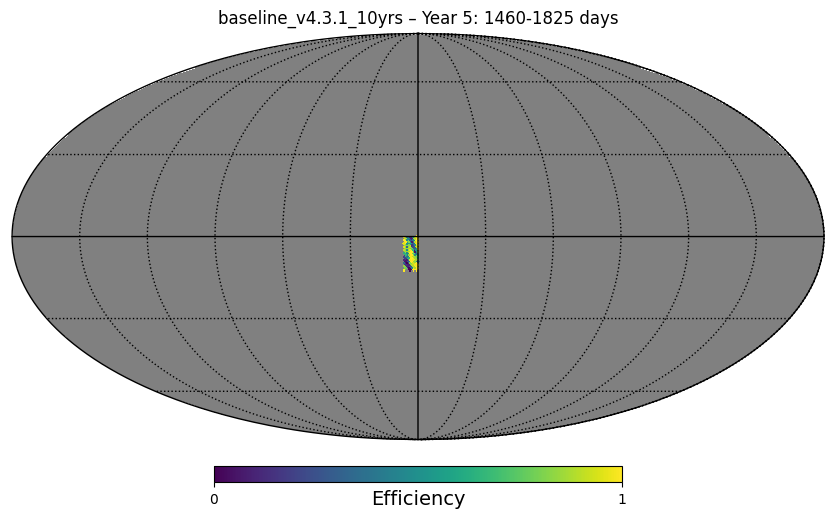

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year5.png

 Year 6: 1825-2190 days
Sample Decs for baseline_v4.3.1_10yrs, Year 6: [ 4.53307345  0.75589852 11.03964394  3.65362216  0.754393    1.4996857
  9.55222755  1.76978805  5.43926623 11.46239329]
Injected GRBs in year 6: 4302


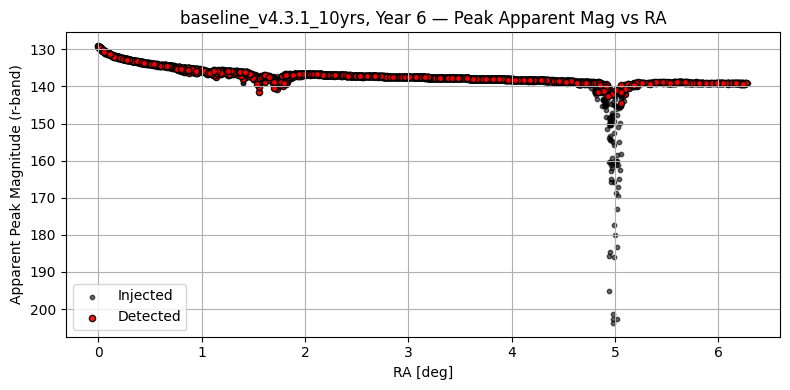

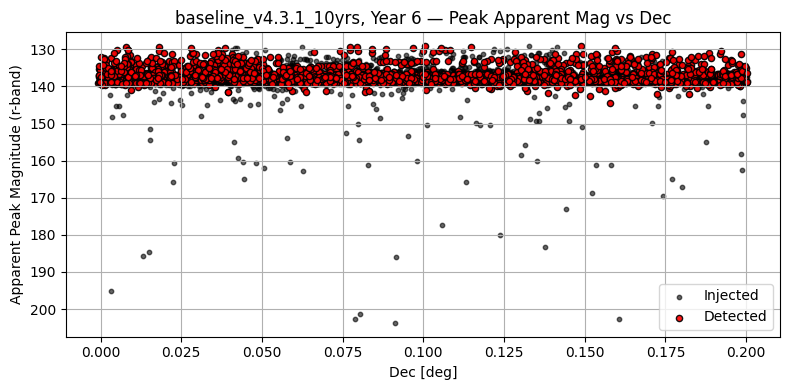


 Out of 4302 simulated GRB events, Rubin detected 2403 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.7 ± 1.5 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 6:
  u-band: 492 detections
  g-band: 926 detections
  r-band: 1436 detections
  i-band: 1471 detections
  z-band: 1276 detections
  y-band: 982 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.07911706 0.01319292 0.19267813 0.06376774 0.01316664 0.02617445
 0.16671782 0.03088863 0.0949331  0.2000565 ]
Theta range (mollview): 1.3703747062788287 1.5715017138148422
Any bad theta? False
Sample Decs (deg) for plotted map: [ 4.53307345  0.75589852 11.03964394  3.65362216  0.754393    1.4996857
  9.55222755  1.76978805  5.43926623 11.46239329]


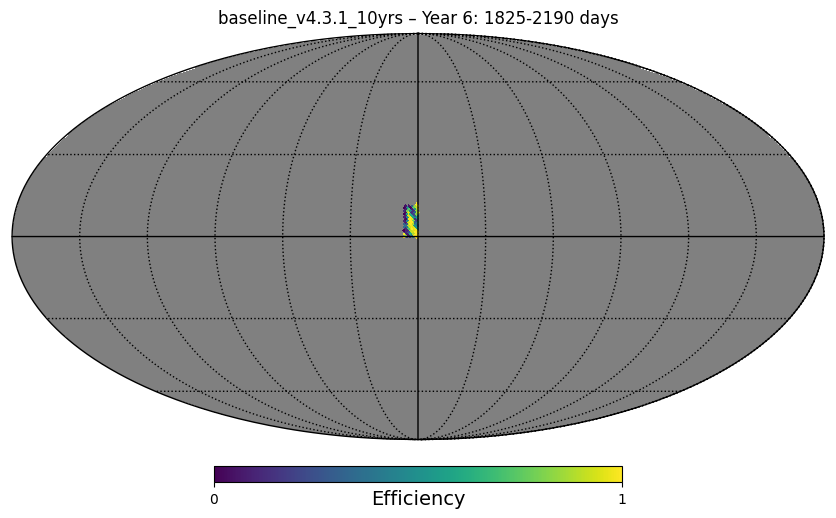

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year6.png

 Year 7: 2190-2555 days
Sample Decs for baseline_v4.3.1_10yrs, Year 7: [13.99439032 16.37544051 15.46439569 11.64941139 17.50274452 12.36305299
 12.12652341 17.55551982 13.01374317 13.57741139]
Injected GRBs in year 7: 4253


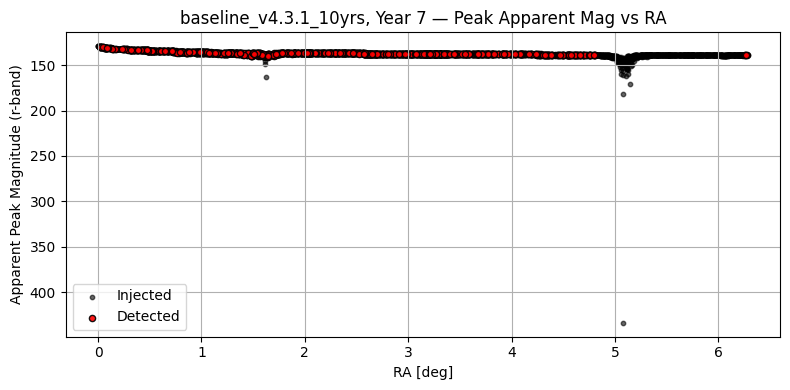

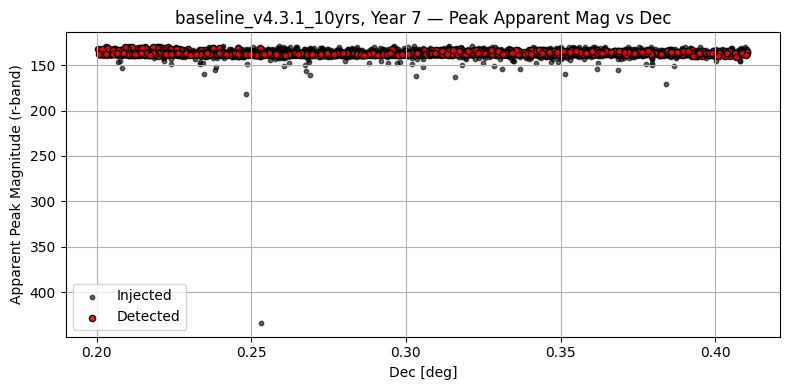


 Out of 4253 simulated GRB events, Rubin detected 1405 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.3 ± 1.2 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 7:
  u-band: 213 detections
  g-band: 607 detections
  r-band: 842 detections
  i-band: 763 detections
  z-band: 599 detections
  y-band: 268 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.24424819 0.28580535 0.26990462 0.20332058 0.30548052 0.21577598
 0.21164776 0.30640162 0.22713267 0.23697053]
Theta range (mollview): 1.1603578335954934 1.3703079795042095
Any bad theta? False
Sample Decs (deg) for plotted map: [13.99439032 16.37544051 15.46439569 11.64941139 17.50274452 12.36305299
 12.12652341 17.55551982 13.01374317 13.57741139]


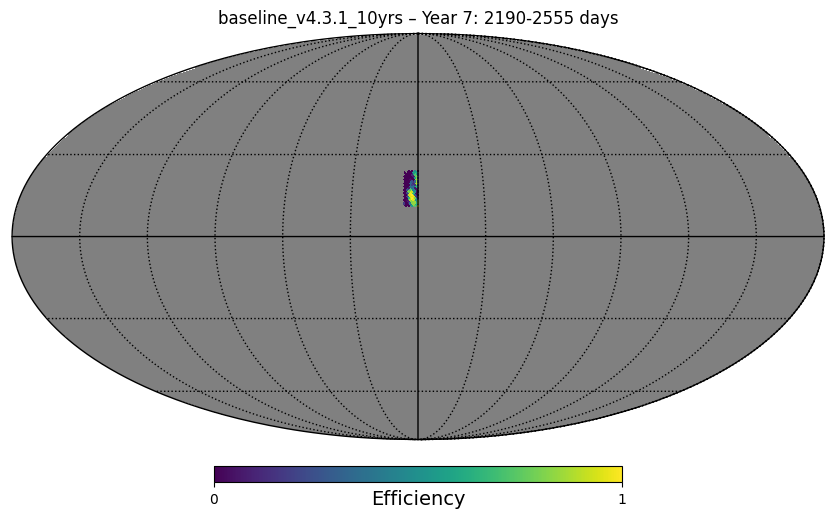

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year7.png

 Year 8: 2555-2920 days
Sample Decs for baseline_v4.3.1_10yrs, Year 8: [31.80183679 30.69608554 28.88722467 31.64210206 31.25160268 30.90053689
 28.6442136  25.29177802 33.3363358  24.78072025]
Injected GRBs in year 8: 4224


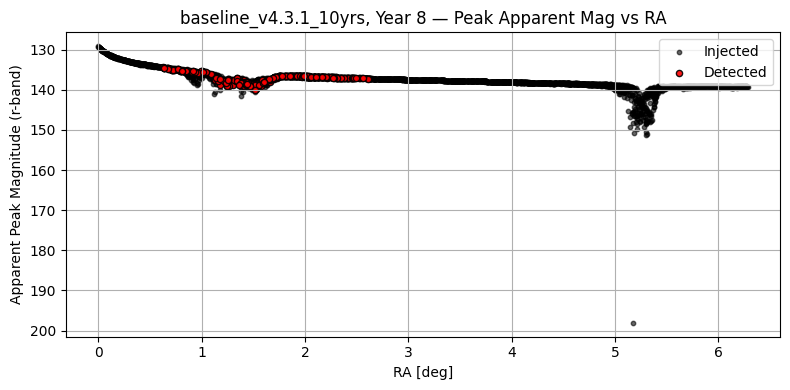

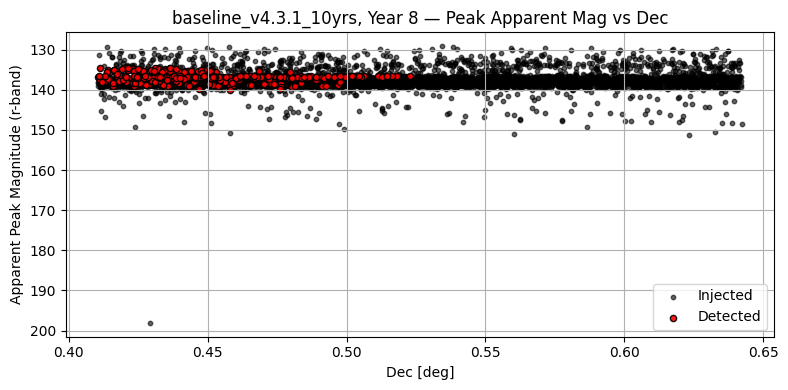


 Out of 4224 simulated GRB events, Rubin detected 368 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 2.1 ± 0.9 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 8:
  u-band: 0 detections
  g-band: 201 detections
  r-band: 261 detections
  i-band: 175 detections
  z-band: 149 detections
  y-band: 0 detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.55504676 0.53574776 0.50417718 0.55225886 0.54544336 0.53931611
 0.49993584 0.4414248  0.58182882 0.43250516]
Theta range (mollview): 0.9286274954285934 1.1602744793541657
Any bad theta? False
Sample Decs (deg) for plotted map: [31.80183679 30.69608554 28.88722467 31.64210206 31.25160268 30.90053689
 28.6442136  25.29177802 33.3363358  24.78072025]


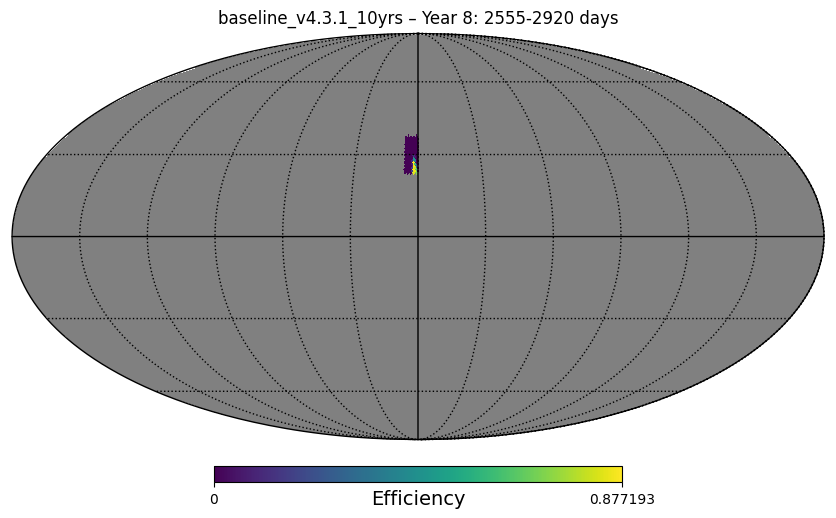

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year8.png

 Year 9: 2920-3285 days
Sample Decs for baseline_v4.3.1_10yrs, Year 9: [38.58993097 52.99727413 41.06077807 43.05238346 37.15280671 40.120617
 40.21551492 38.2117069  42.7276624  52.43704224]
Injected GRBs in year 9: 4081


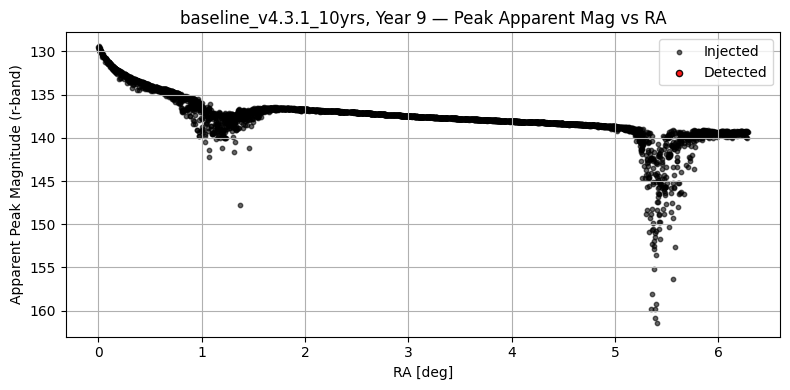

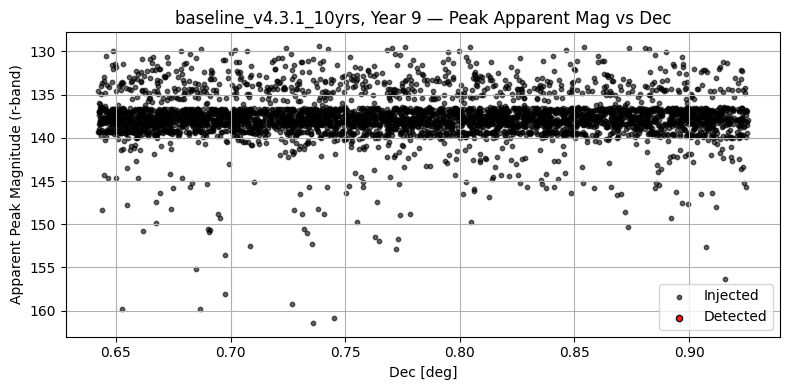


 Out of 4081 simulated GRB events, Rubin detected 0 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 9:
  u-band: -- detections
  g-band: -- detections
  r-band: -- detections
  i-band: -- detections
  z-band: -- detections
  y-band: -- detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [0.67352135 0.92497693 0.71664577 0.75140584 0.6484388  0.70023686
 0.70189315 0.6669201  0.74573839 0.91519904]
Theta range (mollview): 0.6452830037033669 0.928513033747547
Any bad theta? False
Sample Decs (deg) for plotted map: [38.58993097 52.99727413 41.06077807 43.05238346 37.15280671 40.120617
 40.21551492 38.2117069  42.7276624  52.43704224]


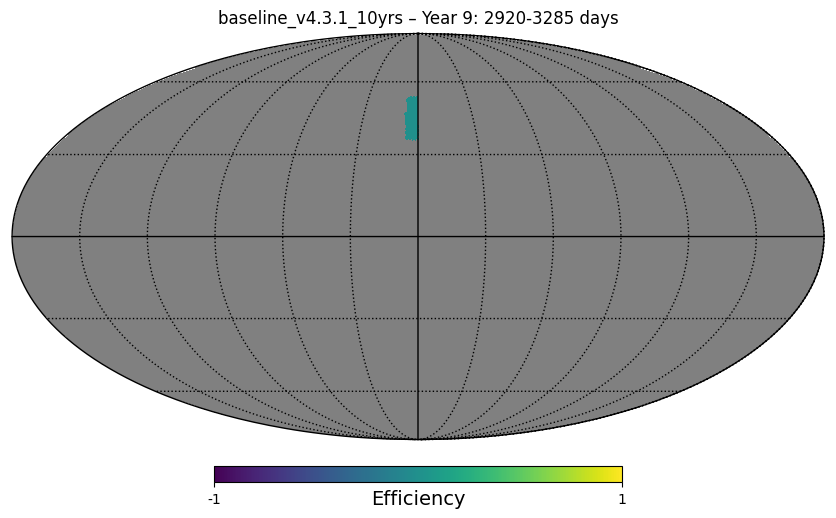

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year9.png

 Year 10: 3285-3652 days
Sample Decs for baseline_v4.3.1_10yrs, Year 10: [75.93167801 66.93446505 75.93882509 58.27830616 53.9095152  68.33901361
 57.1083013  58.5791667  53.2676252  53.64560514]
Injected GRBs in year 10: 4273


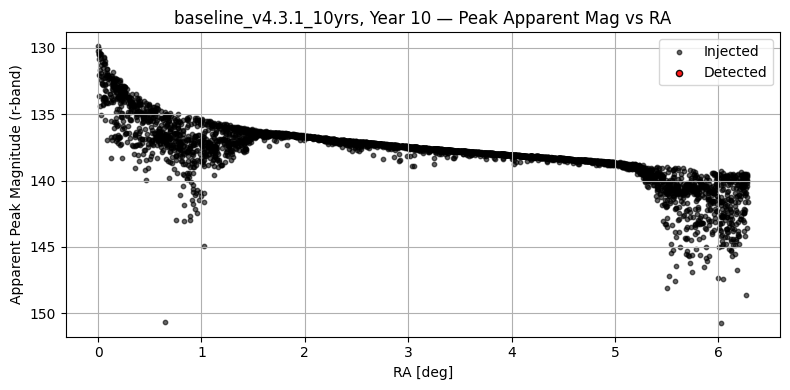

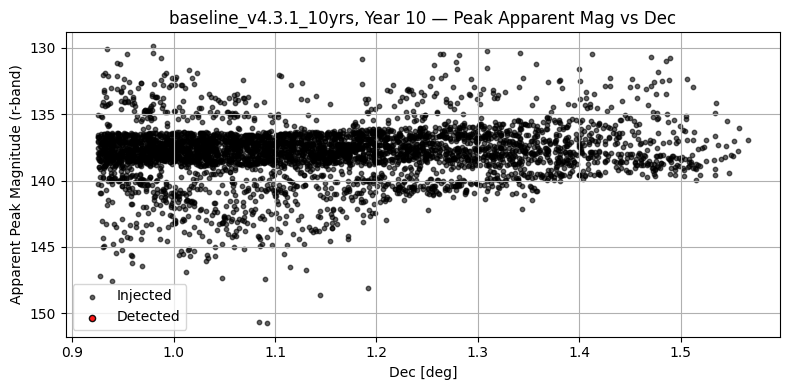


 Out of 4273 simulated GRB events, Rubin detected 0 under the baseline_v4.3.1_10yrs cadence.
   Of those, each event was observed in an average of 0.0 ± 0.0 filters.

 Filter-wise detections for baseline_v4.3.1_10yrs, Year 10:
  u-band: -- detections
  g-band: -- detections
  r-band: -- detections
  i-band: -- detections
  z-band: -- detections
  y-band: -- detections
Saved detection summary to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_combined_detection_summary.csv
Dec (rad) before mollview theta conversion: [1.32525779 1.1682268  1.32538253 1.01714832 0.94089854 1.1927408
 0.99672789 1.02239933 0.92969544 0.93629244]
Theta range (mollview): 0.005006683166878023 0.6452042010210839
Any bad theta? False
Sample Decs (deg) for plotted map: [75.93167801 66.93446505 75.93882509 58.27830616 53.9095152  68.33901361
 57.1083013  58.5791667  53.2676252  53.64560514]


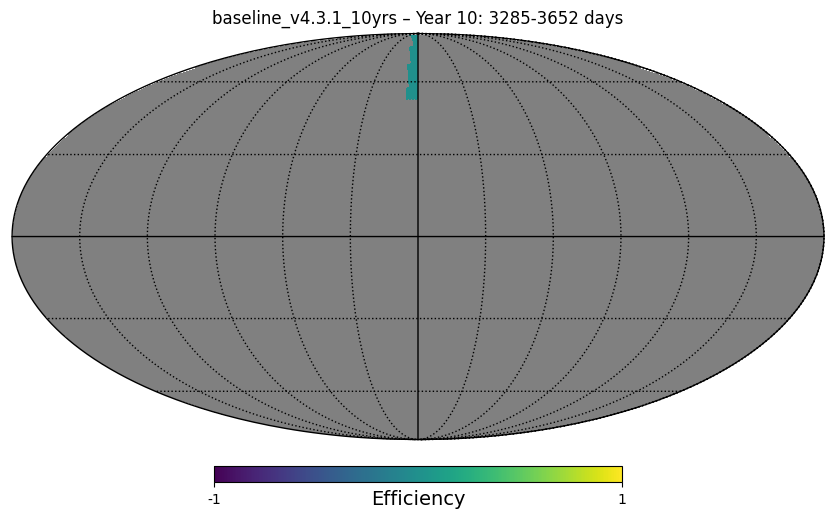

Saved mollview to AllTransient_MetricDetection/GRB_Afterglows_fixedpop_detectonly/rd1em06/baseline_v4.3.1_10yrs_rd1em06_mollview_year10.png


In [114]:
# ---- Per Year Configuration ----
cadences = ['four_roll_v4.3.1_10yrs', 'baseline_v4.3.1_10yrs']
rate_density = 1e-6
rate_str = f"rd{rate_density:.0e}".replace("-", "m")  # Example: 1e-8 to rd1e-8
filters = ['u', 'g', 'r', 'i', 'z', 'y']
grb_templates_file = "GRBAfterglow_templates.pkl"
full_grb_pop_file = os.path.join(out_dir_base, f"GRB_population_fixedpop_10yr_{rate_str}.pkl")
out_dir_base = os.path.join("AllTransient_MetricDetection", f"GRB_Afterglows_fixedpop_detectonly/{rate_str}")
dmin, dmax = 10, 1000
gal_lat_cut = None
year_intervals = [
    (1, 365), (365, 730), (730, 1095), (1095, 1460), (1460, 1825),
    (1825, 2190), (2190, 2555), (2555, 2920), (2920, 3285), (3285, 3652)
]

os.makedirs(os.path.dirname(full_grb_pop_file), exist_ok=True)

# ---- Template and Population Setup ----
if not os.path.exists(grb_templates_file):
    from local_GRBafterglows_metric import generateGRBAfterglowTemplates
    generateGRBAfterglowTemplates(save_to=grb_templates_file)
shared_lc_model = GRBAfterglowLC(load_from=grb_templates_file)

if not os.path.exists(full_grb_pop_file):
    _ = generateGRBPopSlicer(
        t_start=1, t_end=3652,
        seed=42, d_min=dmin, d_max=dmax,
        num_lightcurves=1000,
        gal_lat_cut=gal_lat_cut,
        save_to=full_grb_pop_file,
        rate_density=rate_density
    )

full_slicer = generateGRBPopSlicer(load_from=full_grb_pop_file)

print(f"Injecting population using rate_density = {rate_density:.1e}")

def filter_population_by_time(slicer, t_start, t_end):
    mask = (slicer.slice_points['peak_time'] >= t_start) & (slicer.slice_points['peak_time'] < t_end)
    ra = slicer.slice_points['ra'][mask]
    dec = slicer.slice_points['dec'][mask]
    new_slicer = UserPointsSlicer(ra=ra, dec=dec, badval=0)
    filtered_points = {k: v[mask] for k, v in slicer.slice_points.items()}
    filtered_points['sid'] = np.arange(len(ra))  # Reset to 0,1,...N-1
    new_slicer.slice_points = filtered_points
    return new_slicer


# ---- Main Loop over Cadences and Years ----
for cadence in cadences:
    print(f"\n=== Running GRB Detect-only for cadence: {cadence} ===")
    opsdb = f"{cadence}.db"
    outDir = os.path.join(out_dir_base, f"Metric_temp_{cadence}")
    os.makedirs(outDir, exist_ok=True)
    resultsDb = ResultsDb(out_dir=outDir)

    for yr, (t0, t1) in enumerate(year_intervals):
        print(f"\n Year {yr+1}: {t0}-{t1} days")
        slicer = filter_population_by_time(full_slicer, t0, t1)
        print(f"Sample Decs for {cadence}, Year {yr+1}: {np.degrees(slicer.slice_points['dec'][:10])}")
        n_events = len(slicer.slice_points['distance'])
        print(f"Injected GRBs in year {yr+1}: {n_events}")

        per_filter_metrics = OrderedDict()
        for filt in filters:
            detect = GRBAfterglowDetectMetric(
                metricName=f"GRB_Detect_{filt}", filter_include=[filt], lc_model=shared_lc_model
            )
            per_filter_metrics[f"GRB_Detect_{filt}"] = metric_bundles.MetricBundle(detect, slicer, '')

        pf_group = metric_bundles.MetricBundleGroup(per_filter_metrics, opsdb, out_dir=outDir, results_db=resultsDb)
        pf_group.run_all()
            
        # ---- Print peak m_app = M_abs + DM + A_band vs RA/DEC ----
        # Choose a representative filter ('r')
        filtername = 'r'
        ax1 = DustValues().ax1
        
        peak_mags = []
        ras = []
        decs = []
        detected_flags = []
        
        for i in range(n_events):
            ra = slicer.slice_points['ra'][i]
            dec = slicer.slice_points['dec'][i]
            d = slicer.slice_points['distance'][i]
            ebv = slicer.slice_points['ebv'][i]
            file_indx = slicer.slice_points['file_indx'][i]
        
            m_peak = shared_lc_model.interp(0, filtername, lc_indx=file_indx)
            A = ax1[filtername] * ebv
            dm = 5 * np.log10(d * 1e6) - 5
            m_app = m_peak + dm + A
        
            peak_mags.append(m_app)
            ras.append(ra)
            decs.append(dec)
            detected_flags.append(False)  # We'll update this next
        
        # --- Update detection flags ---
        for f in filters:
            vals = per_filter_metrics[f"GRB_Detect_{f}"].metric_values
            mask = ~vals.mask if hasattr(vals, 'mask') else np.ones(len(vals), dtype=bool)
            for i in range(n_events):
                if (vals[i] == 1) and mask[i]:
                    detected_flags[i] = True
        
        # --- Plot RA ---
        plt.figure(figsize=(8, 4))
        plt.scatter(ras, peak_mags, c='black', s=10, label='Injected', alpha=0.6)
        plt.scatter(np.array(ras)[detected_flags], np.array(peak_mags)[detected_flags],
                    c='red', s=20, label='Detected', alpha=0.9, edgecolors='black')
        plt.xlabel('RA [deg]')
        plt.ylabel(f'Apparent Peak Magnitude ({filtername}-band)')
        plt.title(f'{cadence}, Year {yr+1} — Peak Apparent Mag vs RA')
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        #plt.savefig(os.path.join(out_dir_base, f"{cadence}_{rate_str}_year{yr+1}_peakmag_vs_ra.png"))
        plt.show()
        
        # --- Plot Dec ---
        plt.figure(figsize=(8, 4))
        plt.scatter(decs, peak_mags, c='black', s=10, label='Injected', alpha=0.6)
        plt.scatter(np.array(decs)[detected_flags], np.array(peak_mags)[detected_flags],
                    c='red', s=20, label='Detected', alpha=0.9, edgecolors='black')
        plt.xlabel('Dec [deg]')
        plt.ylabel(f'Apparent Peak Magnitude ({filtername}-band)')
        plt.title(f'{cadence}, Year {yr+1} — Peak Apparent Mag vs Dec')
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        #plt.savefig(os.path.join(out_dir_base, f"{cadence}_{rate_str}_year{yr+1}_peakmag_vs_dec.png"))
        plt.show()


        # -- Filter-level detection count per event --
        n_filters_detected_per_event = np.array([
            sum(
                per_filter_metrics[f"GRB_Detect_{f}"].metric_values[i] == 1
                and not per_filter_metrics[f"GRB_Detect_{f}"].metric_values.mask[i]
                for f in filters
            )
            for i in range(n_events)
        ])
        
        # -- Which events were detected in ≥1 filter --
        detected_mask = n_filters_detected_per_event >= 1
        
        n_detected = np.sum(detected_mask)
        if n_detected > 0:
            mean_filters = np.mean(n_filters_detected_per_event[detected_mask])
            std_filters = np.std(n_filters_detected_per_event[detected_mask])
        else:
            mean_filters = 0.0
            std_filters = 0.0
        
        print(f"\n Out of {n_events} simulated GRB events, Rubin detected {n_detected} under the {cadence} cadence.")
        print(f"   Of those, each event was observed in an average of {mean_filters:.1f} ± {std_filters:.1f} filters.")


        print(f"\n Filter-wise detections for {cadence}, Year {yr+1}:")
        for f in filters:
            vals = per_filter_metrics[f"GRB_Detect_{f}"].metric_values
            mask = ~vals.mask if hasattr(vals, 'mask') else np.ones(len(vals), dtype=bool)
            found = np.sum((vals == 1) & mask)
            print(f"  {f}-band: {found} detections")


        # ---- Save Detection Summary CSV ----
        combined_csv = os.path.join(out_dir_base, f"{cadence}_{rate_str}_combined_detection_summary.csv")
        write_header = not os.path.exists(combined_csv)
        with open(combined_csv, "a") as out:
            if write_header:
                out.write("t_start,t_end,sid,ra,dec,peak_time,distance_Mpc,ebv,n_filters_detected,detected\n")
            for i in range(n_events):
                n_filters_detected = sum(
                    int((not per_filter_metrics[f"GRB_Detect_{f}"].metric_values.mask[i]) and
                        (per_filter_metrics[f"GRB_Detect_{f}"].metric_values[i] == 1))
                    for f in filters
                )
                detected = int(n_filters_detected >= 1)
                out.write(f"{t0},{t1},{i},{slicer.slice_points['ra'][i]:.5f},{slicer.slice_points['dec'][i]:.5f},"
                          f"{slicer.slice_points['peak_time'][i]:.2f},{slicer.slice_points['distance'][i]:.2f},"
                          f"{slicer.slice_points['ebv'][i]:.3f},{n_filters_detected},{detected}\n")

        print(f"Saved detection summary to {combined_csv}")

        # ---- Mollview Plot (All Filter Detections) ----
        nside = slicer.nside if hasattr(slicer, 'nside') else 64
        npix = hp.nside2npix(nside)
        injected_map = np.zeros(npix)
        detected_map = np.zeros(npix)

        ra_rad = np.radians(slicer.slice_points['ra'])
        dec_rad = slicer.slice_points['dec']
        print("Dec (rad) before mollview theta conversion:", dec_rad[:10])
        theta = 0.5 * np.pi - dec_rad
        phi = ra_rad
        pix_inds = hp.ang2pix(nside, theta, phi)
        print("Theta range (mollview):", theta.min(), theta.max())
        print("Any bad theta?", np.any(np.isnan(theta)) or np.any(theta < 0) or np.any(theta > np.pi))

        for i, pix in enumerate(pix_inds):
            injected_map[pix] += 1
            if any(per_filter_metrics[f"GRB_Detect_{f}"].metric_values[i] == 1
                   and not per_filter_metrics[f"GRB_Detect_{f}"].metric_values.mask[i]
                   for f in filters):
                detected_map[pix] += 1

        eff_map = np.zeros(npix)
        mask = injected_map > 0
        eff_map[mask] = detected_map[mask] / injected_map[mask]
        eff_map[~mask] = hp.UNSEEN

        hp.mollview(
            eff_map,
            title=f"{cadence} – Year {yr+1}: {t0}-{t1} days",
            unit='Efficiency',
            cmap='viridis'
        )
        print("Sample Decs (deg) for plotted map:", np.degrees(slicer.slice_points['dec'][:10]))

        hp.graticule()
        png_path = os.path.join(out_dir_base, f"{cadence}_{rate_str}_mollview_year{yr+1}.png")
        #plt.savefig(png_path, dpi=150)
        plt.show()  
        plt.close()
        print(f"Saved mollview to {png_path}")
